# **Title: Employee Leave Prediction**

**About dataset:**
This dataset contains information about employees in a company, including their educational backgrounds, work history, demographics, and employment-related factors. It can be used for various HR and workforse-related analysis,including employee retention,salary structure assesment,diversity and inclusion studies, and leave pattern analyses.

This model predicts whether the employees in a company are likely to take leave or not. It could be beneficial for HR departments to predict leave patterns, plan for staffing needs, and identify potential factors that influence leave decisions.It also will be helpfull for the company to avoid unexpected work delays due employee unavailability.


Importing classes and packages

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import pickle

Reading the CSV File

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/project1/Employee (1).csv')
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3.0,34.0,Male,No,0.0,0
1,Bachelors,2013,Pune,1.0,28.0,Female,No,3.0,1
2,Bachelors,2014,New Delhi,3.0,38.0,Female,No,2.0,0
3,Masters,2016,Bangalore,3.0,27.0,Male,No,5.0,1
4,Masters,2017,Pune,3.0,24.0,Male,Yes,2.0,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3.0,26.0,Female,No,4.0,0
4649,Masters,2013,Pune,2.0,37.0,Male,No,2.0,1
4650,Masters,2018,New Delhi,3.0,27.0,Male,No,5.0,1
4651,Bachelors,2012,Bangalore,3.0,30.0,Male,Yes,2.0,0


In [ ]:
df['City'].value_counts()

Bangalore    2228
Pune         1268
New Delhi    1157
Name: City, dtype: int64

In [ ]:
df['Education'].value_counts()

Bachelors    3601
Masters       873
PHD           179
Name: Education, dtype: int64

Checking for any missing values

In [ ]:
df.isna().sum()

Education                     0
JoiningYear                   0
City                          0
PaymentTier                  54
Age                           8
Gender                        0
EverBenched                   0
ExperienceInCurrentDomain    41
LeaveOrNot                    0
dtype: int64

In [ ]:
df['PaymentTier'].value_counts()

3.0    3449
2.0     909
1.0     241
Name: PaymentTier, dtype: int64

In [ ]:
df['Age'].value_counts()

26.0    645
28.0    629
27.0    623
25.0    418
24.0    383
29.0    230
30.0    220
37.0    141
36.0    138
34.0    136
38.0    136
40.0    134
32.0    131
39.0    130
31.0    125
33.0    124
35.0    123
41.0     82
22.0     49
23.0     48
Name: Age, dtype: int64

In [ ]:
df['ExperienceInCurrentDomain'].value_counts()

2.0    1076
4.0     924
5.0     909
3.0     777
1.0     555
0.0     354
7.0       9
6.0       8
Name: ExperienceInCurrentDomain, dtype: int64

Filling the missing values with mode

In [ ]:
li=['PaymentTier','Age','ExperienceInCurrentDomain']
for i in li:
  df[i]=df[i].fillna(df[i].mode()[0])
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3.0,34.0,Male,No,0.0,0
1,Bachelors,2013,Pune,1.0,28.0,Female,No,3.0,1
2,Bachelors,2014,New Delhi,3.0,38.0,Female,No,2.0,0
3,Masters,2016,Bangalore,3.0,27.0,Male,No,5.0,1
4,Masters,2017,Pune,3.0,24.0,Male,Yes,2.0,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3.0,26.0,Female,No,4.0,0
4649,Masters,2013,Pune,2.0,37.0,Male,No,2.0,1
4650,Masters,2018,New Delhi,3.0,27.0,Male,No,5.0,1
4651,Bachelors,2012,Bangalore,3.0,30.0,Male,Yes,2.0,0


Rechecking for any missing values

In [ ]:
df.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

Checking if all columns are numeric

In [ ]:
df.dtypes

Education                     object
JoiningYear                    int64
City                          object
PaymentTier                  float64
Age                          float64
Gender                        object
EverBenched                   object
ExperienceInCurrentDomain    float64
LeaveOrNot                     int64
dtype: object

Converting object datatype values to numeric

In [ ]:
le=LabelEncoder()
df['Education']=le.fit_transform(df['Education'])
le1=LabelEncoder()
df['City']=le1.fit_transform(df['City'])
le2=LabelEncoder()
df['Gender']=le2.fit_transform(df['Gender'])
le3=LabelEncoder()
df['EverBenched']=le3.fit_transform(df['EverBenched'])
df.dtypes

Education                      int64
JoiningYear                    int64
City                           int64
PaymentTier                  float64
Age                          float64
Gender                         int64
EverBenched                    int64
ExperienceInCurrentDomain    float64
LeaveOrNot                     int64
dtype: object

In [ ]:
df.corr()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
Education,1.000000,0.142670,0.149903,-0.139297,-0.010132,-0.010889,-0.052249,-0.005878,0.080497
JoiningYear,0.142670,1.000000,0.051441,-0.095313,0.012858,-0.012213,0.049353,-0.036155,0.181705
City,0.149903,0.051441,1.000000,-0.296960,-0.030722,-0.168546,-0.007046,-0.008944,0.201058
PaymentTier,-0.139297,-0.095313,-0.296960,1.000000,0.006164,0.233697,0.018843,0.015910,-0.197832
Age,-0.010132,0.012858,-0.030722,0.006164,1.000000,-0.005020,-0.016588,-0.131196,-0.050970
Gender,-0.010889,-0.012213,-0.168546,0.233697,-0.005020,1.000000,0.019653,0.008386,-0.220701
EverBenched,-0.052249,0.049353,-0.007046,0.018843,-0.016588,0.019653,1.000000,0.001834,0.078438
ExperienceInCurrentDomain,-0.005878,-0.036155,-0.008944,0.015910,-0.131196,0.008386,0.001834,1.000000,-0.031585
LeaveOrNot,0.080497,0.181705,0.201058,-0.197832,-0.050970,-0.220701,0.078438,-0.031585,1.000000


Count plot

<Axes: title={'center': 'Count plot of employees leave or not'}, xlabel='LeaveOrNot', ylabel='count'>

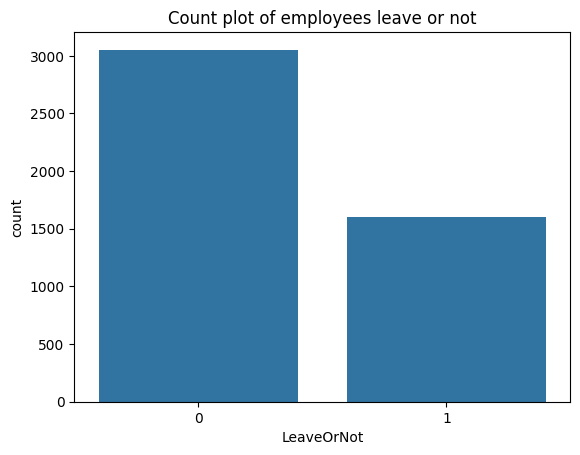

In [ ]:
plt.title('Count plot of employees leave or not')
sns.countplot(x='LeaveOrNot',data=df)

Heat map

<Axes: >

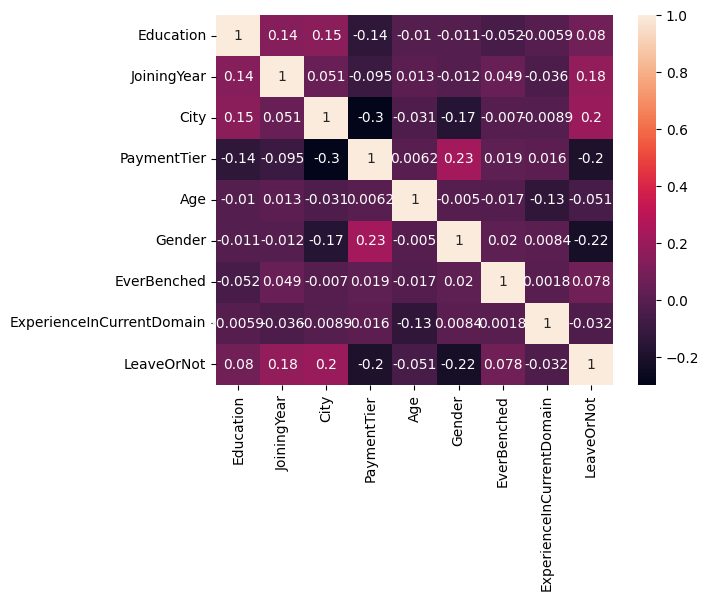

In [ ]:
sns.heatmap(df.corr(),annot=True)

Splitting the dataset into input and output variables

In [ ]:
X=df.iloc[:,:-1]
X

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,0,2017,0,3.0,34.0,1,0,0.0
1,0,2013,2,1.0,28.0,0,0,3.0
2,0,2014,1,3.0,38.0,0,0,2.0
3,1,2016,0,3.0,27.0,1,0,5.0
4,1,2017,2,3.0,24.0,1,1,2.0
...,...,...,...,...,...,...,...,...
4648,0,2013,0,3.0,26.0,0,0,4.0
4649,1,2013,2,2.0,37.0,1,0,2.0
4650,1,2018,1,3.0,27.0,1,0,5.0
4651,0,2012,0,3.0,30.0,1,1,2.0


In [ ]:
Y=df.iloc[:,-1]
Y

0       0
1       1
2       0
3       1
4       1
       ..
4648    0
4649    1
4650    1
4651    0
4652    0
Name: LeaveOrNot, Length: 4653, dtype: int64

In [ ]:
Y.value_counts()

0    3053
1    1600
Name: LeaveOrNot, dtype: int64

Scaling the input variables to a same range

In [ ]:
mms=MinMaxScaler()
X_scaled=mms.fit_transform(X)
X_scaled

array([[0.        , 0.83333333, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.16666667, 1.        , ..., 0.        , 0.        ,
        0.42857143],
       [0.        , 0.33333333, 0.5       , ..., 0.        , 0.        ,
        0.28571429],
       ...,
       [0.5       , 1.        , 0.5       , ..., 1.        , 0.        ,
        0.71428571],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.28571429],
       [0.        , 0.5       , 0.        , ..., 1.        , 1.        ,
        0.57142857]])

Splitting the dataset into train and test data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.3,random_state=1)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((3257, 8), (1396, 8), (3257,), (1396,))

Performing classification algorithms

KNeighbors Classifier

Accuracy= 82.23495702005731
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       894
           1       0.82      0.65      0.72       502

    accuracy                           0.82      1396
   macro avg       0.82      0.78      0.80      1396
weighted avg       0.82      0.82      0.82      1396

ROC-AUC Score 78.39960070233607


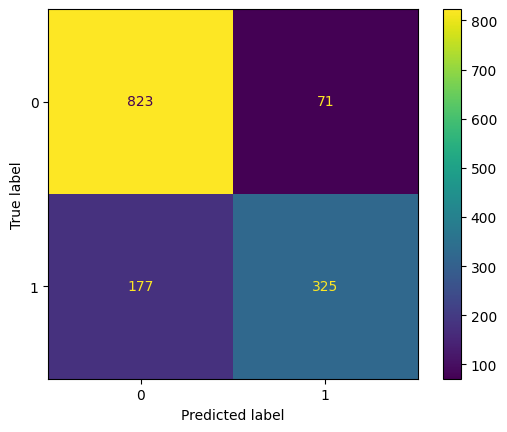

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
Y_pred1=knn.predict(X_test)
print("Accuracy=",accuracy_score(Y_test,Y_pred1)*100)
print(classification_report(Y_test,Y_pred1))
print(ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred1))
print("ROC-AUC Score", roc_auc_score(Y_test,Y_pred1)*100)

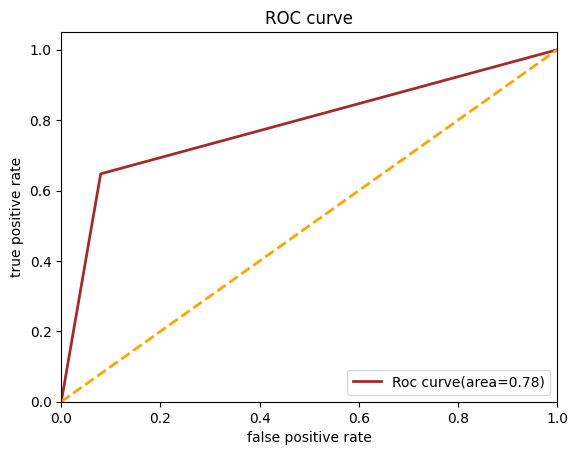

In [ ]:
fpr_knn,tpr_knn,treshold=roc_curve(Y_test,Y_pred1)
auc_knn=auc(fpr_knn,tpr_knn)
plt.figure()
lw=2
plt.plot(fpr_knn,tpr_knn,color='brown',lw=lw,label='Roc curve(area=%0.2f)' %auc_knn)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

SVC

Accuracy= 80.87392550143267
              precision    recall  f1-score   support

           0       0.79      0.96      0.86       894
           1       0.87      0.55      0.67       502

    accuracy                           0.81      1396
   macro avg       0.83      0.75      0.77      1396
weighted avg       0.82      0.81      0.80      1396

ROC-AUC Score 75.15330178168756


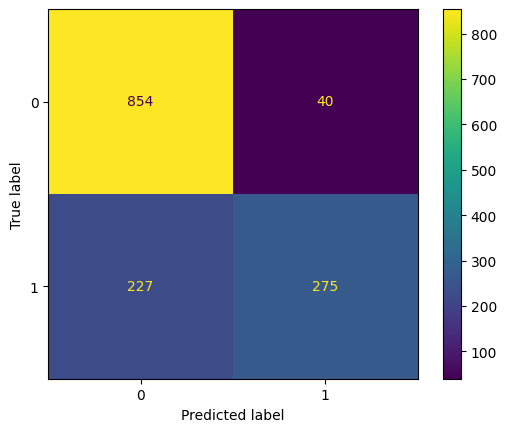

In [ ]:
sv=SVC(kernel='rbf')
sv.fit(X_train,Y_train)
Y_pred2=sv.predict(X_test)
print("Accuracy=", accuracy_score(Y_test,Y_pred2)*100)
print(classification_report(Y_test,Y_pred2))
print(ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred2))
print("ROC-AUC Score", roc_auc_score(Y_test,Y_pred2)*100)

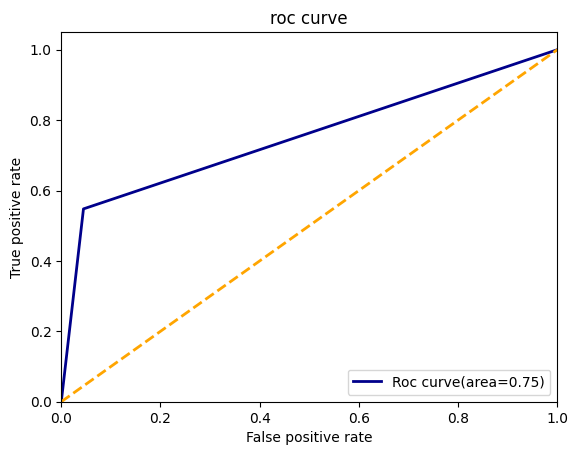

In [ ]:
fpr_sv,tpr_sv,treshold=roc_curve(Y_test,Y_pred2)
auc_sv=auc(fpr_sv,tpr_sv)
plt.figure()
lw=2
plt.plot(fpr_sv,tpr_sv,color='darkblue',lw=lw,label='Roc curve(area=%0.2f)' %auc_sv)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('roc curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()

Gaussian Naive Bayes

Accuracy= 69.12607449856733
              precision    recall  f1-score   support

           0       0.73      0.82      0.77       894
           1       0.59      0.46      0.52       502

    accuracy                           0.69      1396
   macro avg       0.66      0.64      0.65      1396
weighted avg       0.68      0.69      0.68      1396

ROC-AUC Score 64.10309544818489


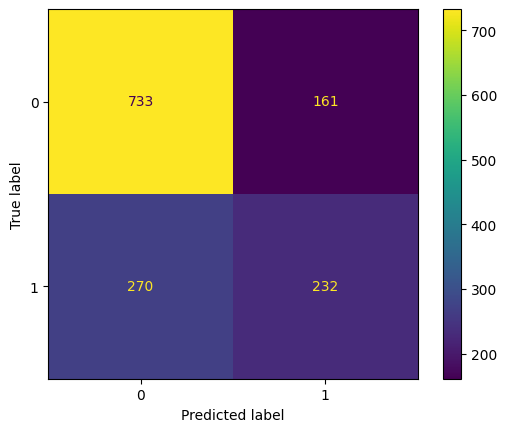

In [ ]:
gnb=GaussianNB()
gnb.fit(X_train,Y_train)
Y_pred3=gnb.predict(X_test)
print("Accuracy=", accuracy_score(Y_test,Y_pred3)*100)
print(classification_report(Y_test,Y_pred3))
print(ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred3))
print("ROC-AUC Score", roc_auc_score(Y_test,Y_pred3)*100)

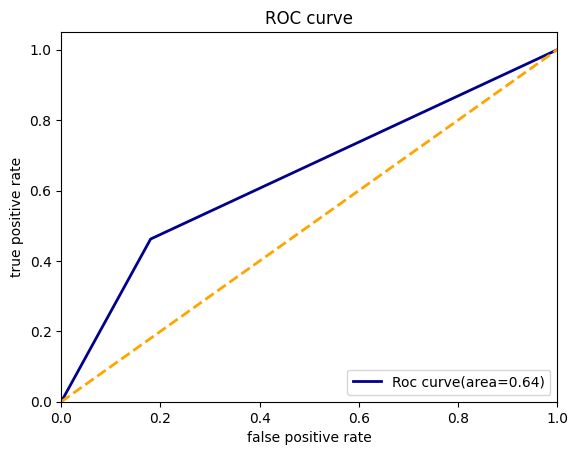

In [ ]:
fpr_gnb,tpr_gnb,treshold=roc_curve(Y_test,Y_pred3)
auc_gnb=auc(fpr_gnb,tpr_gnb)
plt.figure()
plt.plot(fpr_gnb,tpr_gnb,color='darkblue',lw=2,label='Roc curve(area=%0.2f)'%auc_gnb)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Decision Tree Classifier

Accuracy= 79.44126074498567
              precision    recall  f1-score   support

           0       0.77      0.98      0.86       894
           1       0.92      0.47      0.62       502

    accuracy                           0.79      1396
   macro avg       0.84      0.72      0.74      1396
weighted avg       0.82      0.79      0.77      1396

ROC-AUC Score 72.28780626932983


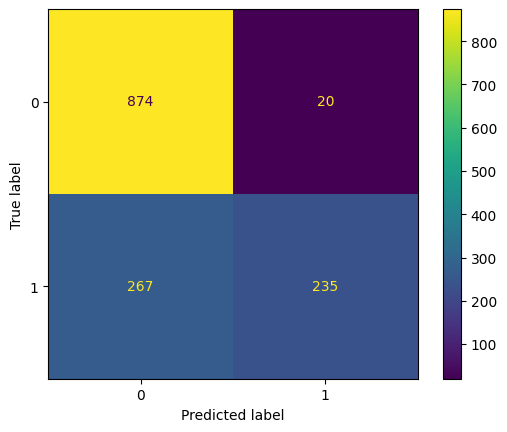

In [ ]:
dtc=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=4)
dtc.fit(X_train,Y_train)
Y_pred4=dtc.predict(X_test)
print("Accuracy=", accuracy_score(Y_test,Y_pred4)*100)
print(classification_report(Y_test,Y_pred4))
print(ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred4))
print("ROC-AUC Score", roc_auc_score(Y_test,Y_pred4)*100)

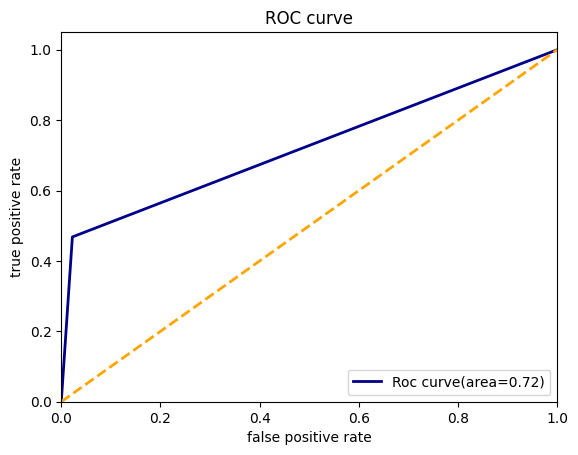

In [ ]:
fpr_dtc,tpr_dtc,treshold=roc_curve(Y_test,Y_pred4)
auc_dtc=auc(fpr_dtc,tpr_dtc)
plt.figure()
plt.plot(fpr_dtc,tpr_dtc,color='darkblue',lw=2,label='Roc curve(area=%.2f)'%auc_dtc)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Random Forest Classifier

Accuracy= 80.15759312320917
              precision    recall  f1-score   support

           0       0.77      0.98      0.86       894
           1       0.92      0.49      0.64       502

    accuracy                           0.80      1396
   macro avg       0.85      0.73      0.75      1396
weighted avg       0.83      0.80      0.78      1396

ROC-AUC Score 73.28382220558481


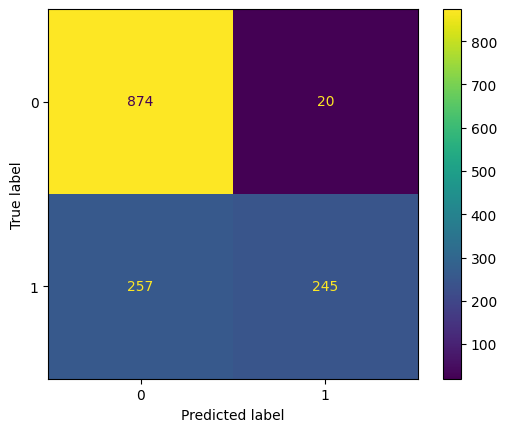

In [ ]:
rfc=RandomForestClassifier(n_estimators=200,random_state=1,criterion='entropy',max_depth=4)
rfc.fit(X_train,Y_train)
Y_pred5=rfc.predict(X_test)
print("Accuracy=", accuracy_score(Y_test,Y_pred5)*100)
print(classification_report(Y_test,Y_pred5))
print(ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred5))
print("ROC-AUC Score", roc_auc_score(Y_test,Y_pred5)*100)

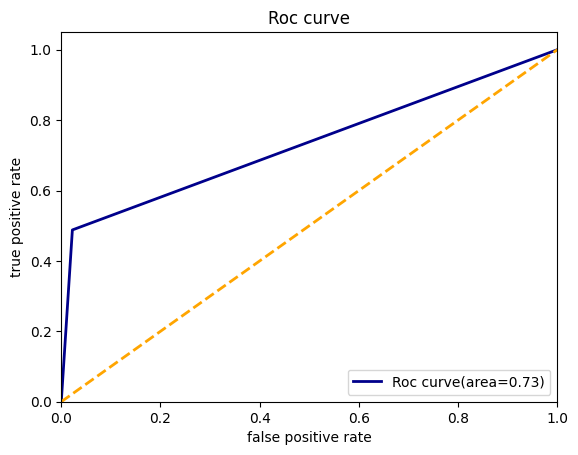

In [ ]:
fpr_rfc,tpr_rfc,treshold=roc_curve(Y_test,Y_pred5)
auc_rfc=auc(fpr_rfc,tpr_rfc)
plt.figure()
plt.plot(fpr_rfc,tpr_rfc,color='darkblue',lw=2,label='Roc curve(area=%.2f)'%auc_rfc)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('Roc curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

AdaBoost Classifier

Accuracy= 78.22349570200574
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       894
           1       0.82      0.51      0.63       502

    accuracy                           0.78      1396
   macro avg       0.80      0.72      0.74      1396
weighted avg       0.79      0.78      0.77      1396

ROC-AUC Score 72.16681372942236


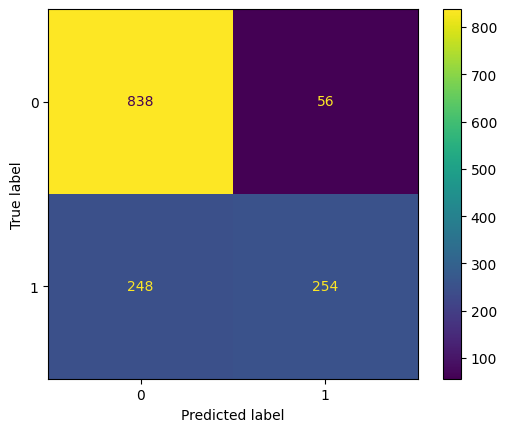

In [ ]:
ad=AdaBoostClassifier(n_estimators=200,random_state=1)
ad.fit(X_train,Y_train)
Y_pred6=ad.predict(X_test)
print("Accuracy=", accuracy_score(Y_test,Y_pred6)*100)
print(classification_report(Y_test,Y_pred6))
print(ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred6))
print("ROC-AUC Score", roc_auc_score(Y_test,Y_pred6)*100)

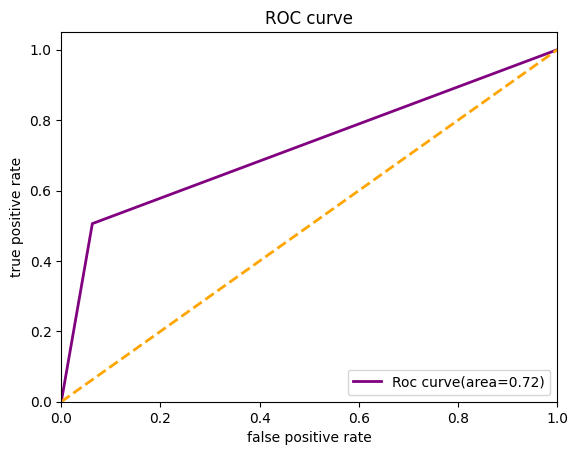

In [ ]:
fpr_ad,tpr_ad,treshold=roc_curve(Y_test,Y_pred6)
auc_ad=auc(fpr_ad,tpr_ad)
plt.figure()
plt.plot(fpr_ad,tpr_ad,color='purple',lw=2,label='Roc curve(area=%.2f)'%auc_ad)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

XGBoost Classifier

Accuracy= 83.95415472779369
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       894
           1       0.84      0.68      0.75       502

    accuracy                           0.84      1396
   macro avg       0.84      0.81      0.82      1396
weighted avg       0.84      0.84      0.84      1396

ROC-AUC Score 80.52799985739368


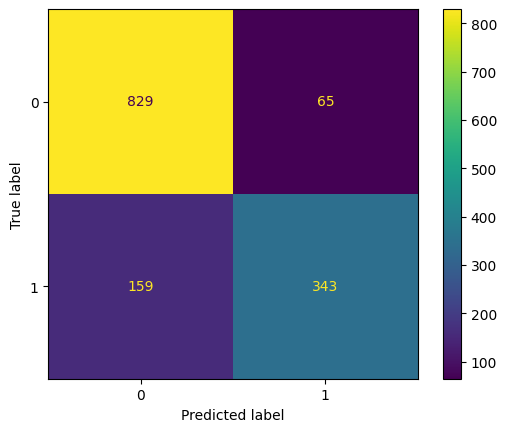

In [ ]:
xgb=XGBClassifier(n_estimators=200,random_state=1)
xgb.fit(X_train,Y_train)
Y_pred7=xgb.predict(X_test)
print("Accuracy=", accuracy_score(Y_test,Y_pred7)*100)
print(classification_report(Y_test,Y_pred7))
print(ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred7))
print("ROC-AUC Score", roc_auc_score(Y_test,Y_pred7)*100)

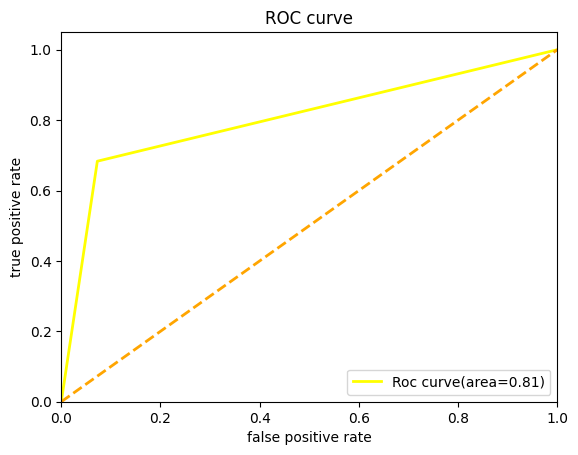

In [ ]:
fpr_xgb,tpr_xgb,treshold=roc_curve(Y_test,Y_pred7)
auc_xgb=auc(fpr_xgb,tpr_xgb)
plt.figure()
plt.plot(fpr_xgb,tpr_xgb,color='yellow',lw=2,label='Roc curve(area=%.2f)'%auc_xgb)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

**Hyperparameter** Tuning

In [ ]:
params_knn={'n_neighbors':[3,5,7,9],
            'weights':['uniform','distance'],
            'algorithm':['auto','ball_tree','kd_tree','brute']}
clf_knn=GridSearchCV(knn,params_knn,cv=5,scoring='accuracy')
clf_knn.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
params_sv={'kernel':['poly','linear','rbf'],
           'gamma':['scale','auto'],
           'decision_function_shape':['ovo','ovr']}
clf_sv=GridSearchCV(sv,params_sv,cv=5,scoring='accuracy')
clf_sv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'linear', 'rbf']},
             scoring='accuracy')

In [ ]:
params_dtc={'criterion':['gini','entropy','log_loss'],
            'splitter':['best','random'],
            'max_depth':[4,5,6,7,8,9,10]}
clf_dtc=GridSearchCV(dtc,params_dtc,cv=5,scoring='accuracy')
clf_dtc.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=4,
                                              random_state=1),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
params_rfc={'n_estimators':[50,100,150,200],
            'max_features':['sqrt','log2'],
            'class_weight':['balanced','balanced_subsample']}
clf_rfc = GridSearchCV(rfc, params_rfc, cv=5, scoring='accuracy')
clf_rfc.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=4,
                                              n_estimators=200,
                                              random_state=1),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [ ]:
params_ad={'n_estimators': [50, 100, 200],
           'random_state':[1,2,3,4,5,6,7,8,9,10]}
clf_ad=GridSearchCV(ad,params_ad,cv=5,scoring='accuracy')
clf_ad.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(n_estimators=200, random_state=1),
             param_grid={'n_estimators': [50, 100, 200],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [ ]:
params_xgb={'n_estimators':[50,100,200],
            'random_state':[1,2,3,4,5,6,7,8,9,10]}
clf_xgb=GridSearchCV(xgb,params_xgb,cv=5,scoring='accuracy')
clf_xgb.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...ne,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=1, ...),
             param_grid={'n_estimators': [50, 100, 200],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [ ]:
print("Best Parameters:")
print("KNeighbours Classifier:",clf_knn.best_params_)
print("SVC:",clf_sv.best_params_)
print("DecisionTree Classifier:",clf_dtc.best_params_)
print("Random Forest Classifier:",clf_rfc.best_params_)
print("AdaBoost Classifier:",clf_ad.best_params_)
print("XGB Classifier:",clf_xgb.best_params_)

Best Parameters:
KNeighbours Classifier: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'}
SVC: {'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'poly'}
DecisionTree Classifier: {'criterion': 'gini', 'max_depth': 7, 'splitter': 'best'}
Random Forest Classifier: {'class_weight': 'balanced_subsample', 'max_features': 'log2', 'n_estimators': 50}
AdaBoost Classifier: {'n_estimators': 50, 'random_state': 1}
XGB Classifier: {'n_estimators': 50, 'random_state': 1}


**Performing classification algorithms with hyperparameter tuning**

Accuracy= 81.87679083094555
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       894
           1       0.84      0.62      0.71       502

    accuracy                           0.82      1396
   macro avg       0.82      0.77      0.79      1396
weighted avg       0.82      0.82      0.81      1396

ROC-AUC Score 77.4211877322923


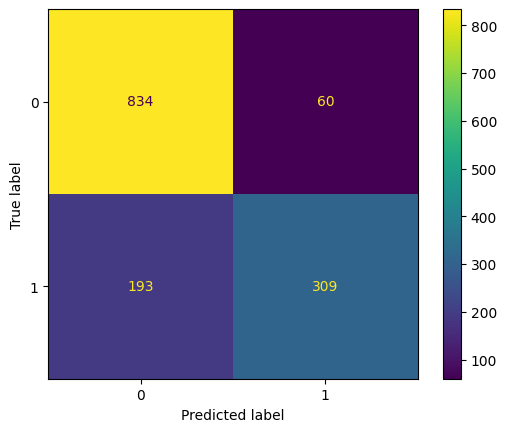

In [ ]:
knn1=KNeighborsClassifier(algorithm='auto',n_neighbors=7,weights='uniform')
knn1.fit(X_train,Y_train)
Y_pred_knn1=knn1.predict(X_test)
print("Accuracy=", accuracy_score(Y_test,Y_pred_knn1)*100)
print(classification_report(Y_test,Y_pred_knn1))
print(ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred_knn1))
print("ROC-AUC Score", roc_auc_score(Y_test,Y_pred_knn1)*100)

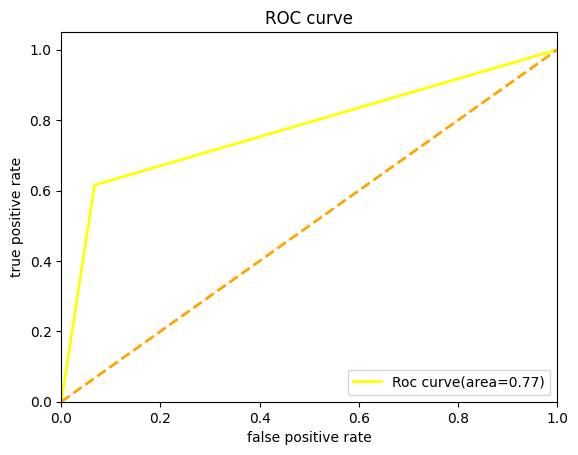

In [ ]:
fpr_knn1,tpr_knn1,treshold=roc_curve(Y_test,Y_pred_knn1)
auc_knn1=auc(fpr_knn1,tpr_knn1)
plt.figure()
plt.plot(fpr_knn1,tpr_knn1,color='yellow',lw=2,label='Roc curve(area=%.2f)'%auc_knn1)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 81.44699140401146
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       894
           1       0.89      0.55      0.68       502

    accuracy                           0.81      1396
   macro avg       0.84      0.76      0.78      1396
weighted avg       0.83      0.81      0.80      1396

ROC-AUC Score 75.7317486207296


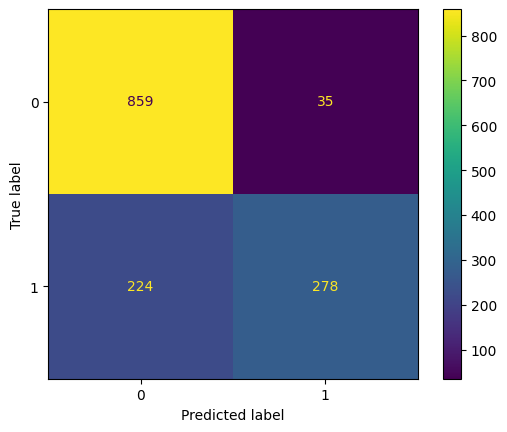

In [ ]:
sv1=SVC(decision_function_shape='ovo',gamma='scale',kernel='poly')
sv1.fit(X_train,Y_train)
Y_pred_sv1=sv1.predict(X_test)
print("Accuracy=", accuracy_score(Y_test,Y_pred_sv1)*100)
print(classification_report(Y_test,Y_pred_sv1))
print(ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred_sv1))
print("ROC-AUC Score", roc_auc_score(Y_test,Y_pred_sv1)*100)

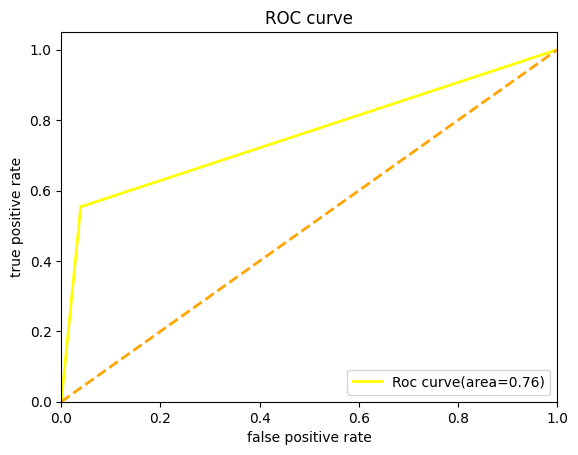

In [ ]:
fpr_sv1,tpr_sv1,treshold=roc_curve(Y_test,Y_pred_sv1)
auc_sv1=auc(fpr_sv1,tpr_sv1)
plt.figure()
plt.plot(fpr_sv1,tpr_sv1,color='yellow',lw=2,label='Roc curve(area=%.2f)'%auc_sv1)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 85.31518624641834
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       894
           1       0.89      0.68      0.77       502

    accuracy                           0.85      1396
   macro avg       0.86      0.81      0.83      1396
weighted avg       0.86      0.85      0.85      1396

ROC-AUC Score 81.4159469504532


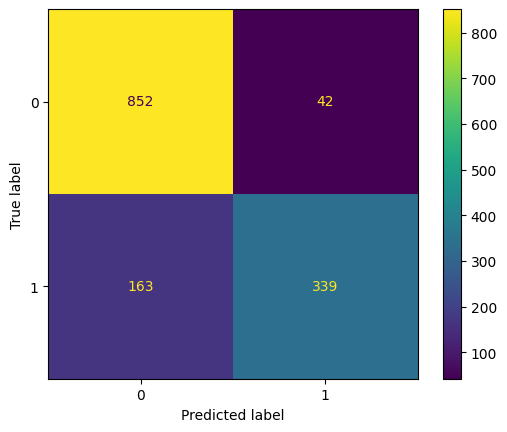

In [ ]:
dtc1=DecisionTreeClassifier(criterion='gini',max_depth=7,splitter='best')
dtc1.fit(X_train,Y_train)
Y_pred_dtc1=dtc1.predict(X_test)
print("Accuracy=", accuracy_score(Y_test,Y_pred_dtc1)*100)
print(classification_report(Y_test,Y_pred_dtc1))
print(ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred_dtc1))
print("ROC-AUC Score", roc_auc_score(Y_test,Y_pred_dtc1)*100)

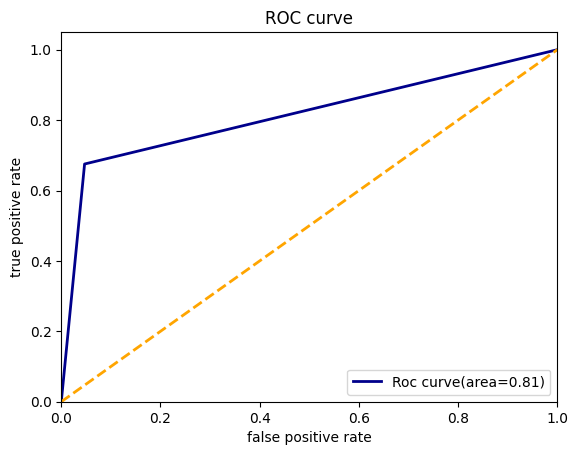

In [ ]:
fpr_dtc1,tpr_dtc1,treshold=roc_curve(Y_test,Y_pred_dtc1)
auc_dtc1=auc(fpr_dtc1,tpr_dtc1)
plt.figure()
plt.plot(fpr_dtc1,tpr_dtc1,color='darkblue',lw=2,label='Roc curve(area=%.2f)'%auc_dtc1)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 82.8080229226361
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       894
           1       0.79      0.71      0.75       502

    accuracy                           0.83      1396
   macro avg       0.82      0.80      0.81      1396
weighted avg       0.83      0.83      0.83      1396

ROC-AUC Score 80.28824300114977


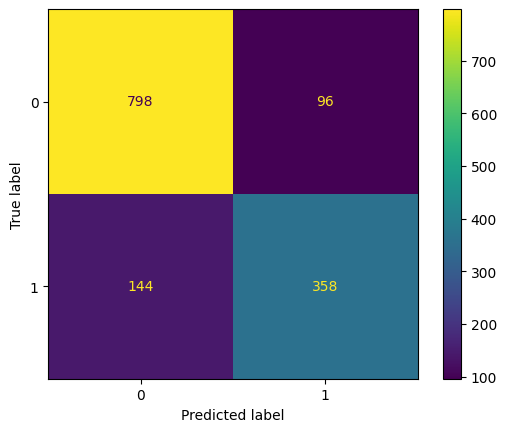

In [ ]:
rfc1=RandomForestClassifier(class_weight='balanced_subsample',max_features='log2',n_estimators=50,random_state=1)
rfc1.fit(X_train,Y_train)
Y_pred_rfc1=rfc1.predict(X_test)
print("Accuracy=", accuracy_score(Y_test,Y_pred_rfc1)*100)
print(classification_report(Y_test,Y_pred_rfc1))
print(ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred_rfc1))
print("ROC-AUC Score", roc_auc_score(Y_test,Y_pred_rfc1)*100)

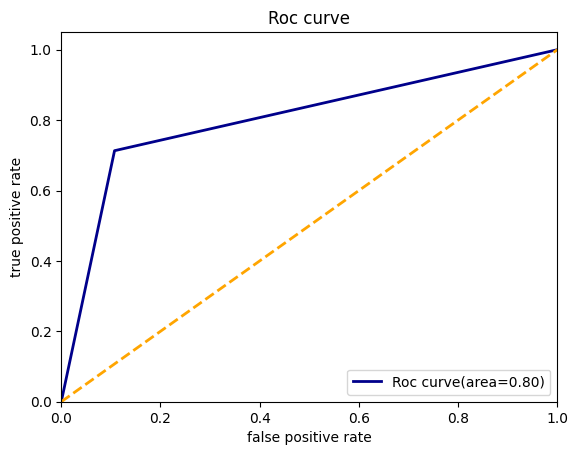

In [ ]:
fpr_rfc1,tpr_rfc1,treshold=roc_curve(Y_test,Y_pred_rfc1)
auc_rfc1=auc(fpr_rfc1,tpr_rfc1)
plt.figure()
plt.plot(fpr_rfc1,tpr_rfc1,color='darkblue',lw=2,label='Roc curve(area=%.2f)'%auc_rfc1)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('Roc curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 78.43839541547278
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       894
           1       0.83      0.50      0.63       502

    accuracy                           0.78      1396
   macro avg       0.80      0.72      0.74      1396
weighted avg       0.79      0.78      0.77      1396

ROC-AUC Score 72.2909257823293


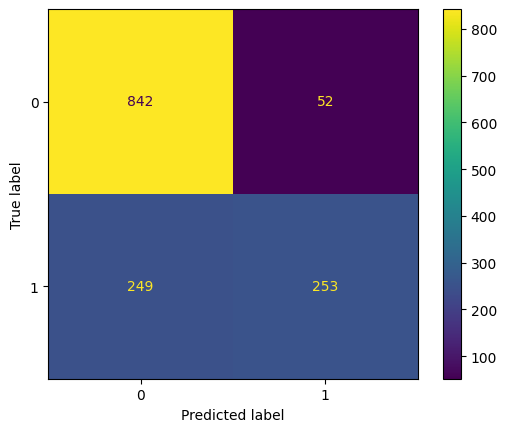

In [ ]:
ad1=AdaBoostClassifier(n_estimators=50,random_state=1)
ad1.fit(X_train,Y_train)
Y_pred_ad1=ad1.predict(X_test)
print("Accuracy=", accuracy_score(Y_test,Y_pred_ad1)*100)
print(classification_report(Y_test,Y_pred_ad1))
print(ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred_ad1))
print("ROC-AUC Score", roc_auc_score(Y_test,Y_pred_ad1)*100)

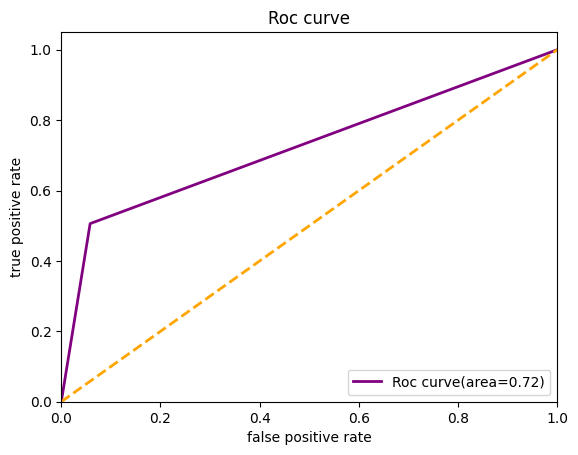

In [ ]:
fpr_ad1,tpr_ad1,treshold=roc_curve(Y_test,Y_pred_ad1)
auc_ad1=auc(fpr_ad1,tpr_ad1)
plt.figure()
plt.plot(fpr_ad1,tpr_ad,color='purple',lw=2,label='Roc curve(area=%.2f)'%auc_ad1)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('Roc curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 85.17191977077364
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       894
           1       0.88      0.68      0.77       502

    accuracy                           0.85      1396
   macro avg       0.86      0.81      0.83      1396
weighted avg       0.85      0.85      0.85      1396

ROC-AUC Score 81.47878285515655


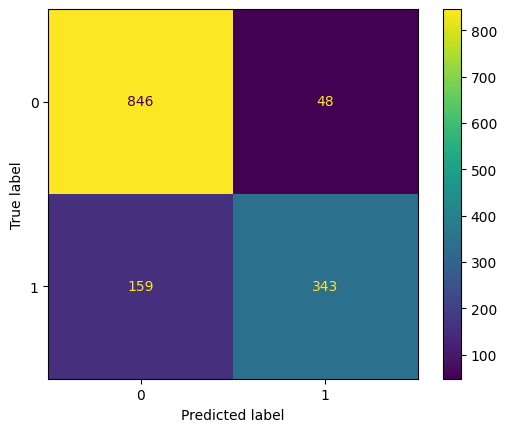

In [ ]:
xgb1=XGBClassifier(n_estimators=50,random_state=1)
xgb1.fit(X_train,Y_train)
Y_pred_xgb1=xgb1.predict(X_test)
print("Accuracy=", accuracy_score(Y_test,Y_pred_xgb1)*100)
print(classification_report(Y_test,Y_pred_xgb1))
print(ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred_xgb1))
print("ROC-AUC Score", roc_auc_score(Y_test,Y_pred_xgb1)*100)

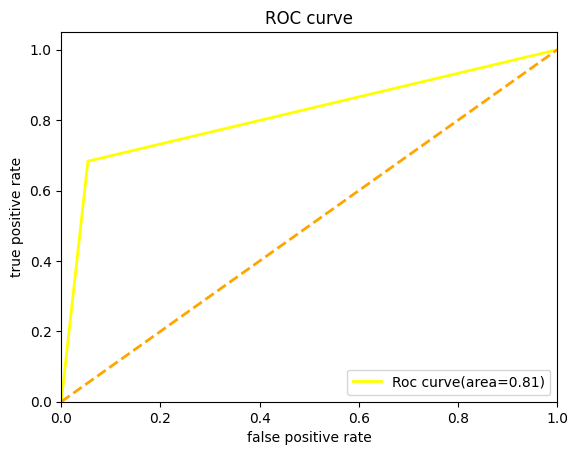

In [ ]:
fpr_xgb1,tpr_xgb1,treshold=roc_curve(Y_test,Y_pred_xgb1)
auc_xgb1=auc(fpr_xgb1,tpr_xgb1)
plt.figure()
plt.plot(fpr_xgb1,tpr_xgb1,color='yellow',lw=2,label='Roc curve(area=%.2f)'%auc_xgb1)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Checking if the values are balanced

In [ ]:
Y.value_counts()

0    3053
1    1600
Name: LeaveOrNot, dtype: int64

Performing oversampling

In [ ]:
os=SMOTE(random_state=1)
X_os,Y_os=os.fit_resample(X,Y)

In [ ]:
Y_os.value_counts()

0    3053
1    3053
Name: LeaveOrNot, dtype: int64

Scaling the input variables to a same range

In [ ]:
mms_os=MinMaxScaler()
X_new_os=mms_os.fit_transform(X_os,Y_os)
X_new_os

array([[0.        , 0.83333333, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.16666667, 1.        , ..., 0.        , 0.        ,
        0.42857143],
       [0.        , 0.33333333, 0.5       , ..., 0.        , 0.        ,
        0.28571429],
       ...,
       [0.        , 0.        , 0.5       , ..., 0.        , 0.        ,
        0.28571429],
       [0.        , 0.16666667, 0.        , ..., 0.        , 0.        ,
        0.53579907],
       [0.        , 0.5       , 0.        , ..., 0.        , 0.        ,
        0.28571429]])

Splitting the dataset into train and test data

In [ ]:
X_train_os,X_test_os,Y_train_os,Y_test_os=train_test_split(X_new_os,Y_os,random_state=1,test_size=0.3)
X_train_os.shape,X_test_os.shape,Y_train_os.shape,Y_test_os.shape

((4274, 8), (1832, 8), (4274,), (1832,))

Performing classification algorithms without hyperparameter tuning

Accuracy= 79.6943231441048
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       902
           1       0.82      0.76      0.79       930

    accuracy                           0.80      1832
   macro avg       0.80      0.80      0.80      1832
weighted avg       0.80      0.80      0.80      1832

ROC-AUC Score 79.74799132155543


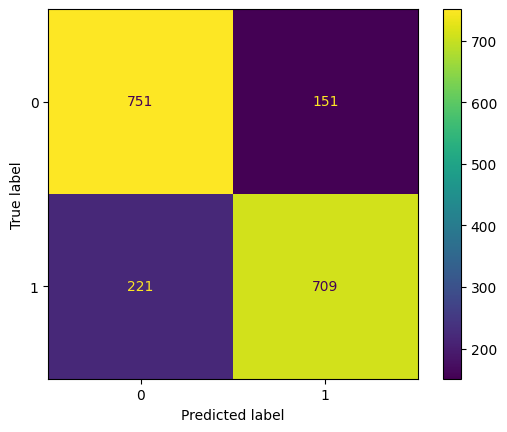

In [ ]:
knn_os=KNeighborsClassifier(n_neighbors=5)
knn_os.fit(X_train_os,Y_train_os)
Y_pred_knn_os=knn_os.predict(X_test_os)
print("Accuracy=", accuracy_score(Y_test_os,Y_pred_knn_os)*100)
print(classification_report(Y_test_os,Y_pred_knn_os))
print(ConfusionMatrixDisplay.from_predictions(Y_test_os,Y_pred_knn_os))
print("ROC-AUC Score", roc_auc_score(Y_test_os,Y_pred_knn_os)*100)

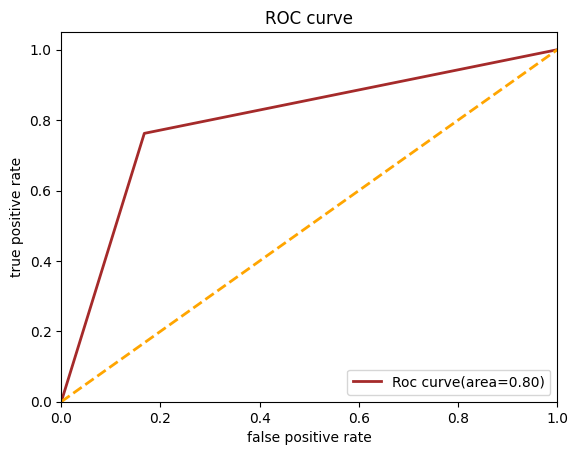

In [ ]:
fpr_knn_os,tpr_knn_os,treshold=roc_curve(Y_test_os,Y_pred_knn_os)
auc_knn_os=auc(fpr_knn_os,tpr_knn_os)
plt.figure()
lw=2
plt.plot(fpr_knn_os,tpr_knn_os,color='brown',lw=lw,label='Roc curve(area=%0.2f)' %auc_knn_os)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 80.45851528384279
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       902
           1       0.87      0.72      0.79       930

    accuracy                           0.80      1832
   macro avg       0.81      0.81      0.80      1832
weighted avg       0.81      0.80      0.80      1832

ROC-AUC Score 80.58245714421955


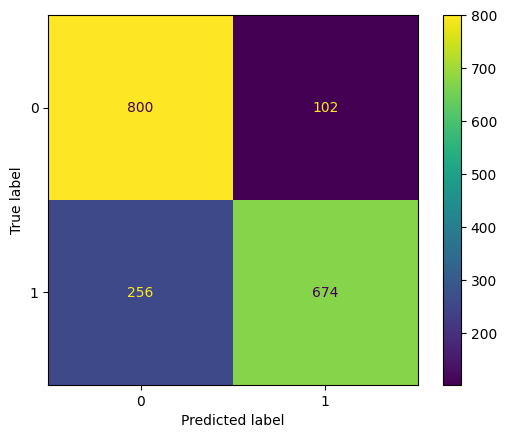

In [ ]:
sv_os=SVC(kernel='rbf')
sv_os.fit(X_train_os,Y_train_os)
Y_pred_sv_os=sv_os.predict(X_test_os)
print("Accuracy=", accuracy_score(Y_test_os,Y_pred_sv_os)*100)
print(classification_report(Y_test_os,Y_pred_sv_os))
print(ConfusionMatrixDisplay.from_predictions(Y_test_os,Y_pred_sv_os))
print("ROC-AUC Score", roc_auc_score(Y_test_os,Y_pred_sv_os)*100)

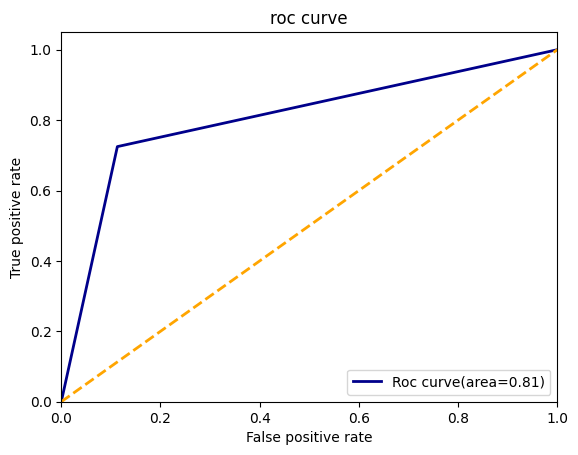

In [ ]:
fpr_sv_os,tpr_sv_os,treshold=roc_curve(Y_test_os,Y_pred_sv_os)
auc_sv_os=auc(fpr_sv_os,tpr_sv_os)
plt.figure()
lw=2
plt.plot(fpr_sv_os,tpr_sv_os,color='darkblue',lw=lw,label='Roc curve(area=%0.2f)' %auc_sv_os)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('roc curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 68.23144104803494
              precision    recall  f1-score   support

           0       0.66      0.73      0.69       902
           1       0.71      0.64      0.67       930

    accuracy                           0.68      1832
   macro avg       0.68      0.68      0.68      1832
weighted avg       0.68      0.68      0.68      1832

ROC-AUC Score 68.29578237131345


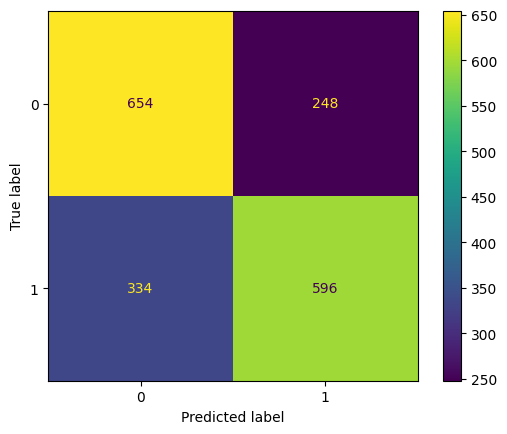

In [ ]:
gnb_os=GaussianNB()
gnb_os.fit(X_train_os,Y_train_os)
Y_pred_gnb_os=gnb_os.predict(X_test_os)
print("Accuracy=", accuracy_score(Y_test_os,Y_pred_gnb_os)*100)
print(classification_report(Y_test_os,Y_pred_gnb_os))
print(ConfusionMatrixDisplay.from_predictions(Y_test_os,Y_pred_gnb_os))
print("ROC-AUC Score", roc_auc_score(Y_test_os,Y_pred_gnb_os)*100)

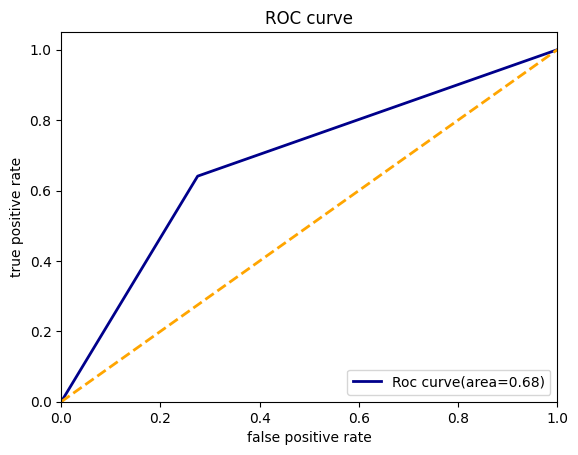

In [ ]:
fpr_gnb_os,tpr_gnb_os,treshold=roc_curve(Y_test_os,Y_pred_gnb_os)
auc_gnb_os=auc(fpr_gnb_os,tpr_gnb_os)
plt.figure()
plt.plot(fpr_gnb_os,tpr_gnb_os,color='darkblue',lw=2,label='Roc curve(area=%0.2f)'%auc_gnb_os)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 75.05458515283843
              precision    recall  f1-score   support

           0       0.70      0.86      0.77       902
           1       0.83      0.64      0.72       930

    accuracy                           0.75      1832
   macro avg       0.76      0.75      0.75      1832
weighted avg       0.77      0.75      0.75      1832

ROC-AUC Score 75.22482893450636


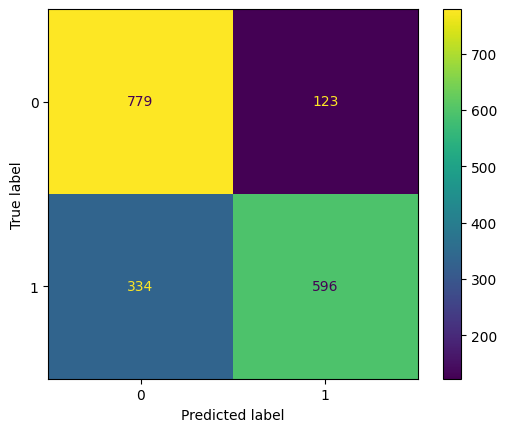

In [ ]:
dtc_os=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=4)
dtc_os.fit(X_train_os,Y_train_os)
Y_pred_dtc_os=dtc_os.predict(X_test_os)
print("Accuracy=", accuracy_score(Y_test_os,Y_pred_dtc_os)*100)
print(classification_report(Y_test_os,Y_pred_dtc_os))
print(ConfusionMatrixDisplay.from_predictions(Y_test_os,Y_pred_dtc_os))
print("ROC-AUC Score", roc_auc_score(Y_test_os,Y_pred_dtc_os)*100)

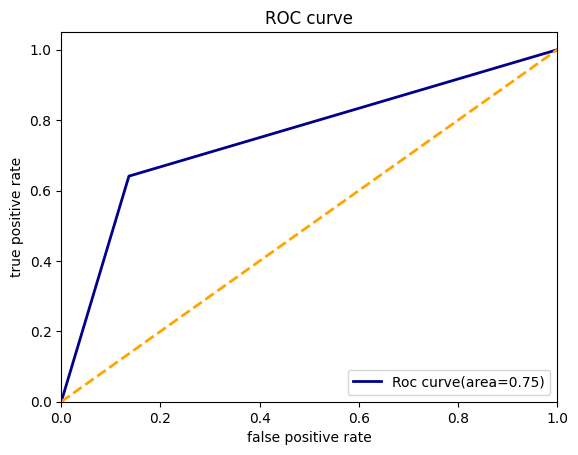

In [ ]:
fpr_dtc_os,tpr_dtc_os,treshold=roc_curve(Y_test_os,Y_pred_dtc_os)
auc_dtc_os=auc(fpr_dtc_os,tpr_dtc_os)
plt.figure()
plt.plot(fpr_dtc_os,tpr_dtc_os,color='darkblue',lw=2,label='Roc curve(area=%0.2f)'%auc_dtc_os)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 78.76637554585153
              precision    recall  f1-score   support

           0       0.73      0.91      0.81       902
           1       0.89      0.67      0.76       930

    accuracy                           0.79      1832
   macro avg       0.81      0.79      0.79      1832
weighted avg       0.81      0.79      0.78      1832

ROC-AUC Score 78.9541759053954


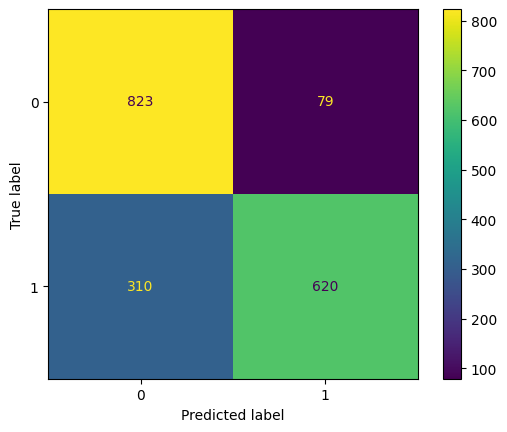

In [ ]:
rfc_os=RandomForestClassifier(n_estimators=200,random_state=1,criterion='entropy',max_depth=4)
rfc_os.fit(X_train_os,Y_train_os)
Y_pred_rfc_os=rfc_os.predict(X_test_os)
print("Accuracy=", accuracy_score(Y_test_os,Y_pred_rfc_os)*100)
print(classification_report(Y_test_os,Y_pred_rfc_os))
print(ConfusionMatrixDisplay.from_predictions(Y_test_os,Y_pred_rfc_os))
print("ROC-AUC Score", roc_auc_score(Y_test_os,Y_pred_rfc_os)*100)

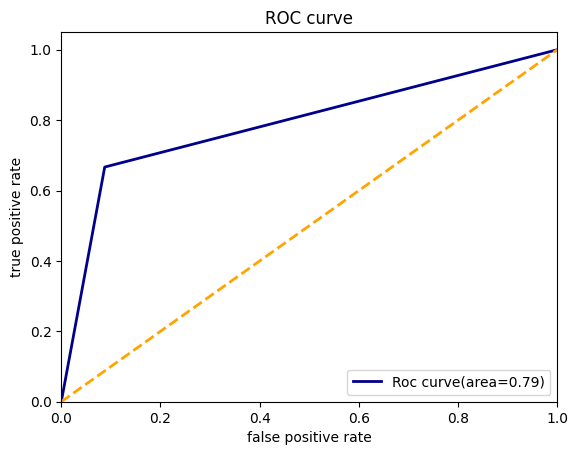

In [ ]:
fpr_rfc_os,tpr_rfc_os,treshold=roc_curve(Y_test_os,Y_pred_rfc_os)
auc_rfc_os=auc(fpr_rfc_os,tpr_rfc_os)
plt.figure()
plt.plot(fpr_rfc_os,tpr_rfc_os,color='darkblue',lw=2,label='Roc curve(area=%0.2f)'%auc_rfc_os)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 78.5480349344978
              precision    recall  f1-score   support

           0       0.74      0.88      0.80       902
           1       0.86      0.69      0.77       930

    accuracy                           0.79      1832
   macro avg       0.80      0.79      0.78      1832
weighted avg       0.80      0.79      0.78      1832

ROC-AUC Score 78.69239205588536


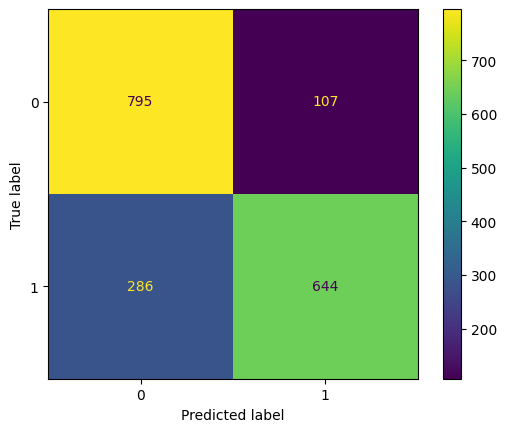

In [ ]:
ad_os=AdaBoostClassifier(n_estimators=200,random_state=1)
ad_os.fit(X_train_os,Y_train_os)
Y_pred_ad_os=ad_os.predict(X_test_os)
print("Accuracy=", accuracy_score(Y_test_os,Y_pred_ad_os)*100)
print(classification_report(Y_test_os,Y_pred_ad_os))
print(ConfusionMatrixDisplay.from_predictions(Y_test_os,Y_pred_ad_os))
print("ROC-AUC Score", roc_auc_score(Y_test_os,Y_pred_ad_os)*100)

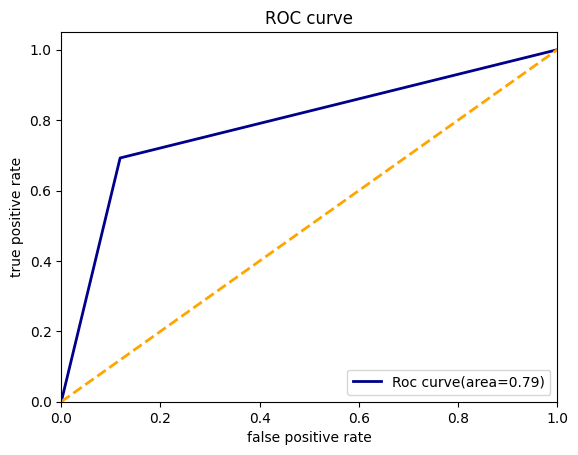

In [ ]:
fpr_ad_os,tpr_ad_os,treshold=roc_curve(Y_test_os,Y_pred_ad_os)
auc_ad_os=auc(fpr_ad_os,tpr_ad_os)
plt.figure()
plt.plot(fpr_ad_os,tpr_ad_os,color='darkblue',lw=2,label='Roc curve(area=%0.2f)'%auc_ad_os)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 83.46069868995633
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       902
           1       0.88      0.78      0.83       930

    accuracy                           0.83      1832
   macro avg       0.84      0.84      0.83      1832
weighted avg       0.84      0.83      0.83      1832

ROC-AUC Score 83.5411153231767


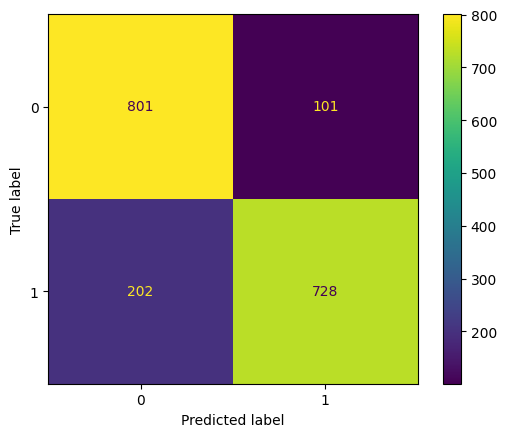

In [ ]:
xgb_os=XGBClassifier(n_estimators=200,random_state=1)
xgb_os.fit(X_train_os,Y_train_os)
Y_pred_xgb_os=xgb_os.predict(X_test_os)
print("Accuracy=", accuracy_score(Y_test_os,Y_pred_xgb_os)*100)
print(classification_report(Y_test_os,Y_pred_xgb_os))
print(ConfusionMatrixDisplay.from_predictions(Y_test_os,Y_pred_xgb_os))
print("ROC-AUC Score", roc_auc_score(Y_test_os,Y_pred_xgb_os)*100)

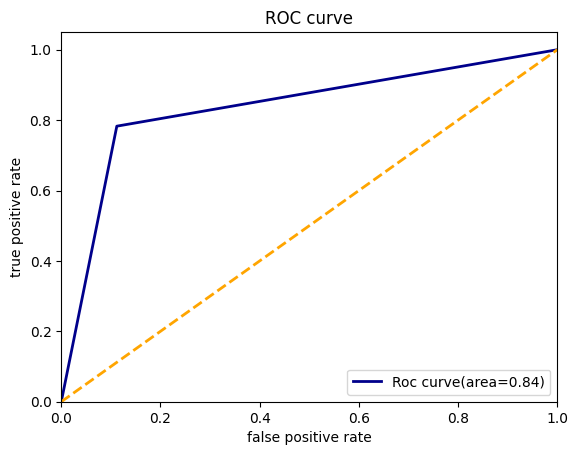

In [ ]:
fpr_xgb_os,tpr_xgb_os,treshold=roc_curve(Y_test_os,Y_pred_xgb_os)
auc_xgb_os=auc(fpr_xgb_os,tpr_xgb_os)
plt.figure()
plt.plot(fpr_xgb_os,tpr_xgb_os,color='darkblue',lw=2,label='Roc curve(area=%0.2f)'%auc_xgb_os)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Hyperparameter Tuning

In [ ]:
params_knn_os={'n_neighbors':[3,5,7,9],
            'weights':['uniform','distance'],
            'algorithm':['auto','ball_tree','kd_tree','brute']}
clf_knn_os=GridSearchCV(knn_os,params_knn_os,cv=5,scoring='accuracy')
clf_knn_os.fit(X_train_os,Y_train_os)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
params_sv_os={'kernel':['poly','linear','rbf'],
           'gamma':['scale','auto'],
           'decision_function_shape':['ovo','ovr']}
clf_sv_os=GridSearchCV(sv_os,params_sv_os,cv=5,scoring='accuracy')
clf_sv_os.fit(X_train_os,Y_train_os)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'linear', 'rbf']},
             scoring='accuracy')

In [ ]:
params_dtc_os={'criterion':['gini','entropy','log_loss'],
            'splitter':['best','random'],
            'max_depth':[4,5,6,7,8,9,10]}
clf_dtc_os=GridSearchCV(dtc_os,params_dtc_os,cv=5,scoring='accuracy')
clf_dtc_os.fit(X_train_os,Y_train_os)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=4,
                                              random_state=1),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
params_rfc_os={'n_estimators':[50,100,150,200],
            'max_features':['sqrt','log2'],
            'class_weight':['balanced','balanced_subsample']}
clf_rfc_os = GridSearchCV(rfc_os, params_rfc_os, cv=5, scoring='accuracy')
clf_rfc_os.fit(X_train_os, Y_train_os)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=4,
                                              n_estimators=200,
                                              random_state=1),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [ ]:
params_ad_os={'n_estimators': [50, 100, 200],
           'random_state':[1,2,3,4,5,6,7,8,9,10]}
clf_ad_os=GridSearchCV(ad_os,params_ad_os,cv=5,scoring='accuracy')
clf_ad_os.fit(X_train_os,Y_train_os)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(n_estimators=200, random_state=1),
             param_grid={'n_estimators': [50, 100, 200],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [ ]:
params_xgb_os={'n_estimators':[50,100,200],
            'random_state':[1,2,3,4,5,6,7,8,9,10]}
clf_xgb_os=GridSearchCV(xgb_os,params_xgb_os,cv=5,scoring='accuracy')
clf_xgb_os.fit(X_train_os,Y_train_os)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...ne,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=1, ...),
             param_grid={'n_estimators': [50, 100, 200],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [ ]:
print("Best Parameters:")
print("KNeighbours Classifier:",clf_knn_os.best_params_)
print("SVC:",clf_sv_os.best_params_)
print("DecisionTree Classifier:",clf_dtc_os.best_params_)
print("Random Forest Classifier:",clf_rfc_os.best_params_)
print("AdaBoost Classifier:",clf_ad_os.best_params_)
print("XGB Classifier:",clf_xgb_os.best_params_)

Best Parameters:
KNeighbours Classifier: {'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'distance'}
SVC: {'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}
DecisionTree Classifier: {'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}
Random Forest Classifier: {'class_weight': 'balanced', 'max_features': 'log2', 'n_estimators': 150}
AdaBoost Classifier: {'n_estimators': 200, 'random_state': 1}
XGB Classifier: {'n_estimators': 50, 'random_state': 1}


Performing classification algorithms after hyperparameter tuning

Accuracy= 80.51310043668121
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       902
           1       0.84      0.76      0.80       930

    accuracy                           0.81      1832
   macro avg       0.81      0.81      0.80      1832
weighted avg       0.81      0.81      0.80      1832

ROC-AUC Score 80.57780797749326


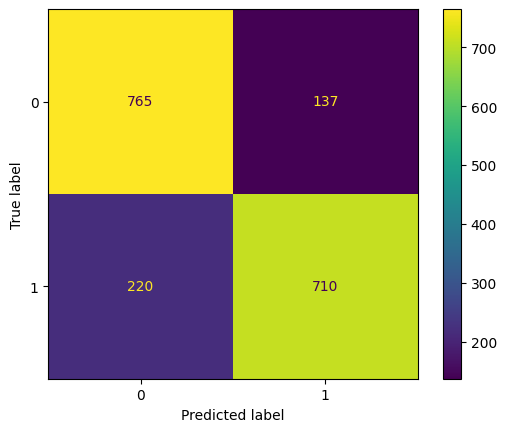

In [ ]:
knn1_os=KNeighborsClassifier(algorithm='ball_tree',n_neighbors=7,weights='distance')
knn1_os.fit(X_train_os,Y_train_os)
Y_pred_knn1_os=knn1_os.predict(X_test_os)
print("Accuracy=", accuracy_score(Y_test_os,Y_pred_knn1_os)*100)
print(classification_report(Y_test_os,Y_pred_knn1_os))
print(ConfusionMatrixDisplay.from_predictions(Y_test_os,Y_pred_knn1_os))
print("ROC-AUC Score", roc_auc_score(Y_test_os,Y_pred_knn1_os)*100)

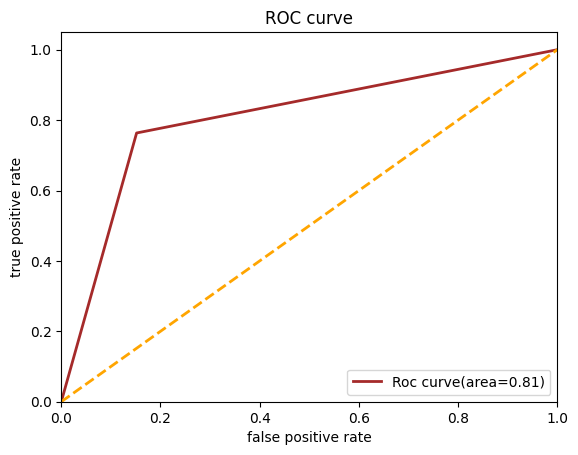

In [ ]:
fpr_knn1_os,tpr_knn1_os,treshold=roc_curve(Y_test_os,Y_pred_knn1_os)
auc_knn1_os=auc(fpr_knn1_os,tpr_knn1_os)
plt.figure()
lw=2
plt.plot(fpr_knn1_os,tpr_knn1_os,color='brown',lw=lw,label='Roc curve(area=%0.2f)' %auc_knn1_os)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 80.45851528384279
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       902
           1       0.87      0.72      0.79       930

    accuracy                           0.80      1832
   macro avg       0.81      0.81      0.80      1832
weighted avg       0.81      0.80      0.80      1832

ROC-AUC Score 80.58245714421955


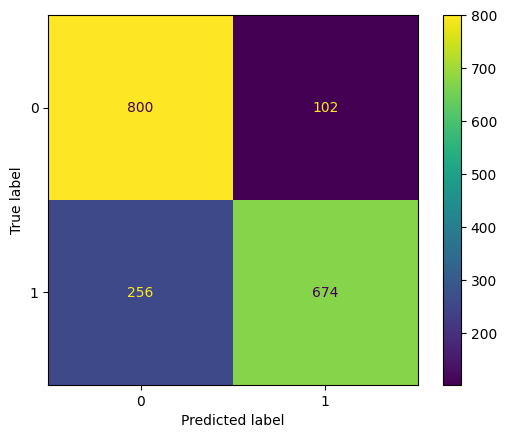

In [ ]:
sv1_os=SVC(decision_function_shape='ovo',gamma='scale',kernel='rbf')
sv1_os.fit(X_train_os,Y_train_os)
Y_pred_sv1_os=sv1_os.predict(X_test_os)
print("Accuracy=", accuracy_score(Y_test_os,Y_pred_sv1_os)*100)
print(classification_report(Y_test_os,Y_pred_sv1_os))
print(ConfusionMatrixDisplay.from_predictions(Y_test_os,Y_pred_sv1_os))
print("ROC-AUC Score", roc_auc_score(Y_test_os,Y_pred_sv1_os)*100)

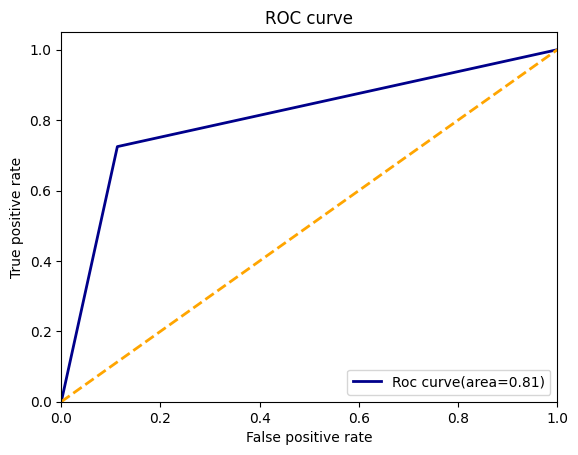

In [ ]:
fpr_sv1_os,tpr_sv1_os,treshold=roc_curve(Y_test_os,Y_pred_sv1_os)
auc_sv1_os=auc(fpr_sv1_os,tpr_sv1_os)
plt.figure()
lw=2
plt.plot(fpr_sv1_os,tpr_sv1_os,color='darkblue',lw=lw,label='Roc curve(area=%0.2f)' %auc_sv1_os)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 82.86026200873363
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       902
           1       0.93      0.72      0.81       930

    accuracy                           0.83      1832
   macro avg       0.85      0.83      0.83      1832
weighted avg       0.85      0.83      0.83      1832

ROC-AUC Score 83.02982619269008


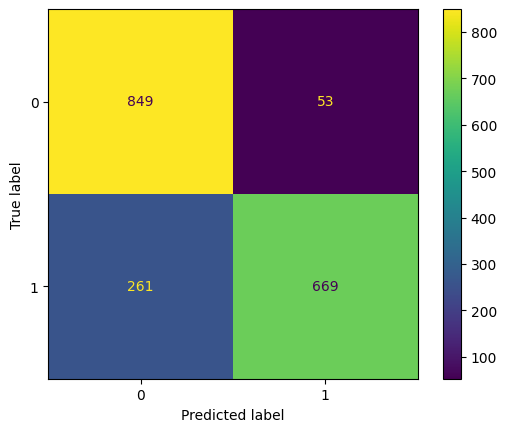

In [ ]:
dtc1_os=DecisionTreeClassifier(criterion='entropy',max_depth=10,splitter='best')
dtc1_os.fit(X_train_os,Y_train_os)
Y_pred_dtc1_os=dtc1_os.predict(X_test_os)
print("Accuracy=", accuracy_score(Y_test_os,Y_pred_dtc1_os)*100)
print(classification_report(Y_test_os,Y_pred_dtc1_os))
print(ConfusionMatrixDisplay.from_predictions(Y_test_os,Y_pred_dtc1_os))
print("ROC-AUC Score", roc_auc_score(Y_test_os,Y_pred_dtc1_os)*100)

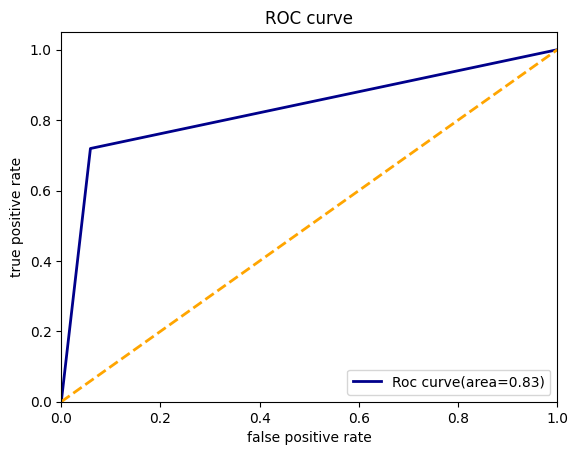

In [ ]:
fpr_dtc1_os,tpr_dtc1_os,treshold=roc_curve(Y_test_os,Y_pred_dtc1_os)
auc_dtc1_os=auc(fpr_dtc1_os,tpr_dtc1_os)
plt.figure()
plt.plot(fpr_dtc1_os,tpr_dtc1_os,color='darkblue',lw=2,label='Roc curve(area=%0.2f)'%auc_dtc1_os)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 82.75109170305677
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       902
           1       0.86      0.79      0.82       930

    accuracy                           0.83      1832
   macro avg       0.83      0.83      0.83      1832
weighted avg       0.83      0.83      0.83      1832

ROC-AUC Score 82.81548768566867


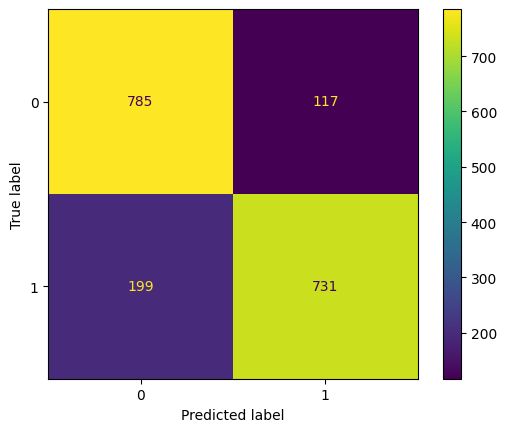

In [ ]:
rfc1_os=RandomForestClassifier(class_weight='balanced',max_features='log2',n_estimators=150,random_state=1)
rfc1_os.fit(X_train_os,Y_train_os)
Y_pred_rfc1_os=rfc1_os.predict(X_test_os)
print("Accuracy=", accuracy_score(Y_test_os,Y_pred_rfc1_os)*100)
print(classification_report(Y_test_os,Y_pred_rfc1_os))
print(ConfusionMatrixDisplay.from_predictions(Y_test_os,Y_pred_rfc1_os))
print("ROC-AUC Score", roc_auc_score(Y_test_os,Y_pred_rfc1_os)*100)

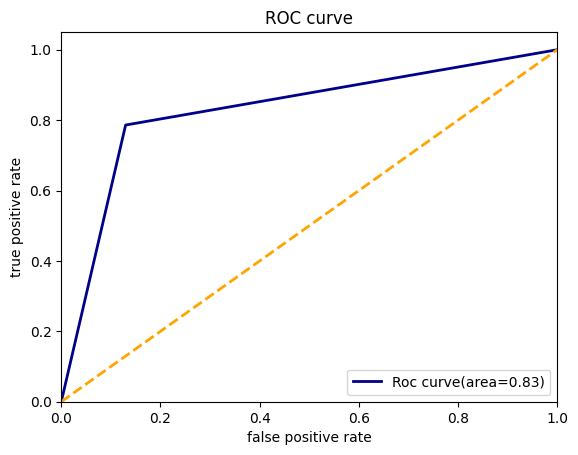

In [ ]:
fpr_rfc1_os,tpr_rfc1_os,treshold=roc_curve(Y_test_os,Y_pred_rfc1_os)
auc_rfc1_os=auc(fpr_rfc1_os,tpr_rfc1_os)
plt.figure()
plt.plot(fpr_rfc1_os,tpr_rfc1_os,color='darkblue',lw=2,label='Roc curve(area=%0.2f)'%auc_rfc1_os)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 83.67903930131004
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       902
           1       0.88      0.78      0.83       930

    accuracy                           0.84      1832
   macro avg       0.84      0.84      0.84      1832
weighted avg       0.84      0.84      0.84      1832

ROC-AUC Score 83.7645137448442


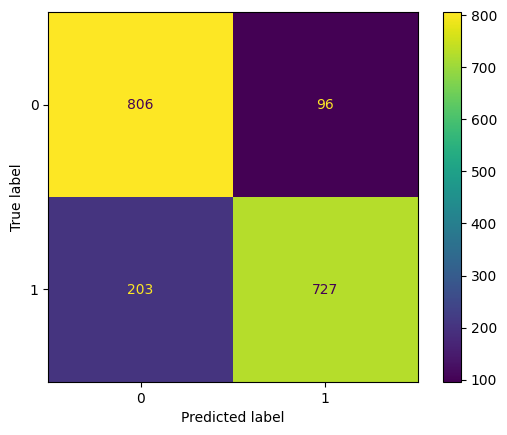

In [ ]:
xgb1_os=XGBClassifier(n_estimators=150, random_state=1)
xgb1_os.fit(X_train_os,Y_train_os)
Y_pred_xgb1_os=xgb1_os.predict(X_test_os)
print("Accuracy=", accuracy_score(Y_test_os,Y_pred_xgb1_os)*100)
print(classification_report(Y_test_os,Y_pred_xgb1_os))
print(ConfusionMatrixDisplay.from_predictions(Y_test_os,Y_pred_xgb1_os))
print("ROC-AUC Score", roc_auc_score(Y_test_os,Y_pred_xgb1_os)*100)

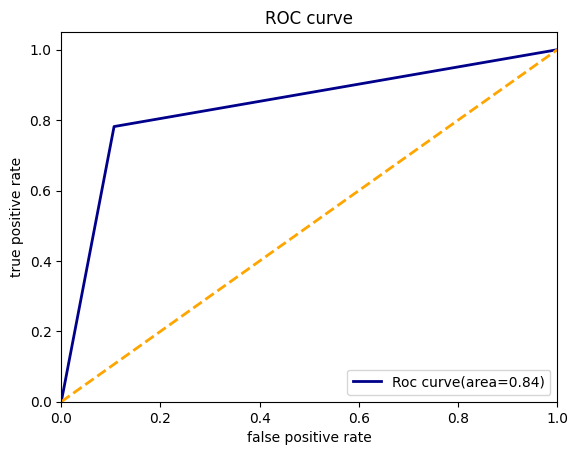

In [ ]:
fpr_xgb1_os,tpr_xgb1_os,treshold=roc_curve(Y_test_os,Y_pred_xgb1_os)
auc_xgb1_os=auc(fpr_xgb1_os,tpr_xgb1_os)
plt.figure()
plt.plot(fpr_xgb1_os,tpr_xgb1_os,color='darkblue',lw=2,label='Roc curve(area=%0.2f)'%auc_xgb1_os)
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

In [ ]:
Y.value_counts()

0    3053
1    1600
Name: LeaveOrNot, dtype: int64

Performing undersampling

In [ ]:
us=RandomUnderSampler()
X_us,Y_us=us.fit_resample(X,Y)

In [ ]:
Y_us.value_counts()

0    1600
1    1600
Name: LeaveOrNot, dtype: int64

Scaling the input variables to a same range

In [ ]:
mms_us=MinMaxScaler()
X_new_us=mms_os.fit_transform(X_us,Y_us)
X_new_us

array([[0.        , 0.33333333, 1.        , ..., 1.        , 0.        ,
        0.57142857],
       [0.5       , 0.5       , 1.        , ..., 0.        , 0.        ,
        0.28571429],
       [0.        , 0.5       , 0.        , ..., 1.        , 0.        ,
        0.28571429],
       ...,
       [0.        , 0.5       , 1.        , ..., 0.        , 1.        ,
        0.14285714],
       [0.5       , 0.16666667, 1.        , ..., 1.        , 0.        ,
        0.28571429],
       [0.5       , 1.        , 0.5       , ..., 1.        , 0.        ,
        0.71428571]])

Splitting the dataset into train and test data

In [ ]:
X_train_us,X_test_us,Y_train_us,Y_test_us=train_test_split(X_new_us,Y_us,random_state=1,test_size=0.3)
X_train_us.shape,X_test_us.shape,Y_train_us.shape,Y_test_us.shape

((2240, 8), (960, 8), (2240,), (960,))

Performing classification algorithms without hyperparameter tuning

Accuracy= 76.77083333333333
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       493
           1       0.79      0.71      0.75       467

    accuracy                           0.77       960
   macro avg       0.77      0.77      0.77       960
weighted avg       0.77      0.77      0.77       960

ROC-AUC Score 76.61544275097619


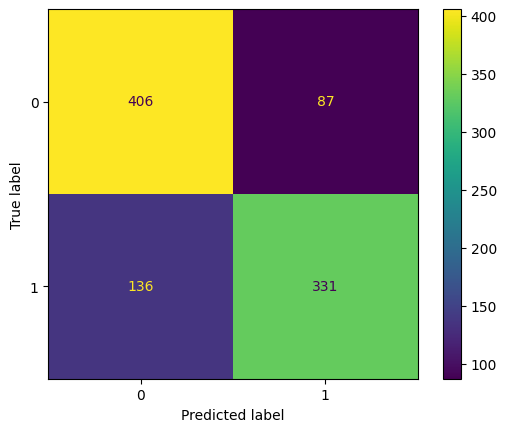

In [ ]:
knn_us=KNeighborsClassifier(n_neighbors=5)
knn_us.fit(X_train_us,Y_train_us)
Y_pred_knn_us=knn_us.predict(X_test_us)
print("Accuracy=", accuracy_score(Y_test_us,Y_pred_knn_us)*100)
print(classification_report(Y_test_us,Y_pred_knn_us))
print(ConfusionMatrixDisplay.from_predictions(Y_test_us,Y_pred_knn_us))
print("ROC-AUC Score", roc_auc_score(Y_test_us,Y_pred_knn_us)*100)

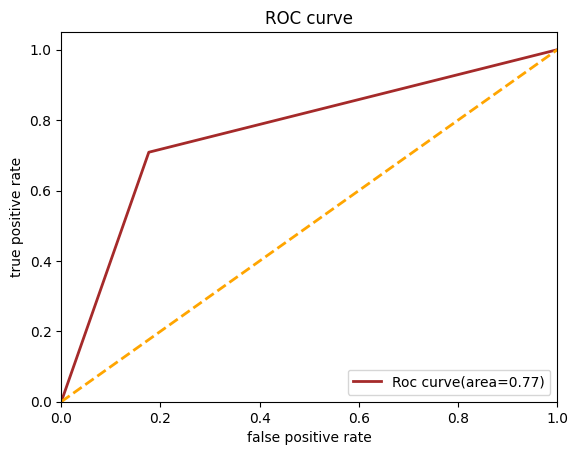

In [ ]:
fpr_knn_us,tpr_knn_us,treshold=roc_curve(Y_test_us,Y_pred_knn_us)
auc_knn_us=auc(fpr_knn_us,tpr_knn_us)
plt.figure()
lw=2
plt.plot(fpr_knn_us,tpr_knn_us,color='brown',lw=lw,label='Roc curve(area=%0.2f)' %auc_knn_us)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 75.72916666666667
              precision    recall  f1-score   support

           0       0.74      0.81      0.77       493
           1       0.78      0.70      0.74       467

    accuracy                           0.76       960
   macro avg       0.76      0.76      0.76       960
weighted avg       0.76      0.76      0.76       960

ROC-AUC Score 75.57865795657405


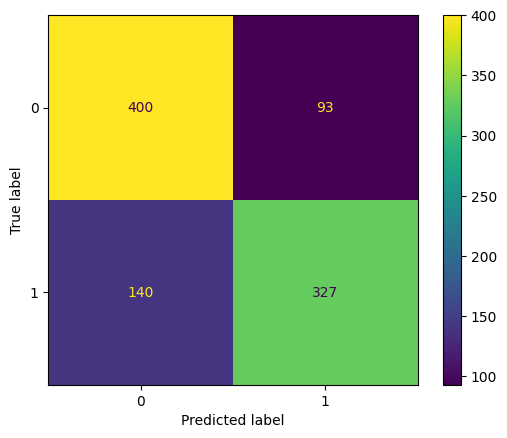

In [ ]:
sv_us=SVC(kernel='rbf')
sv_us.fit(X_train_us,Y_train_us)
Y_pred_sv_us=sv_us.predict(X_test_us)
print("Accuracy=", accuracy_score(Y_test_us,Y_pred_sv_us)*100)
print(classification_report(Y_test_us,Y_pred_sv_us))
print(ConfusionMatrixDisplay.from_predictions(Y_test_us,Y_pred_sv_us))
print("ROC-AUC Score", roc_auc_score(Y_test_us,Y_pred_sv_us)*100)

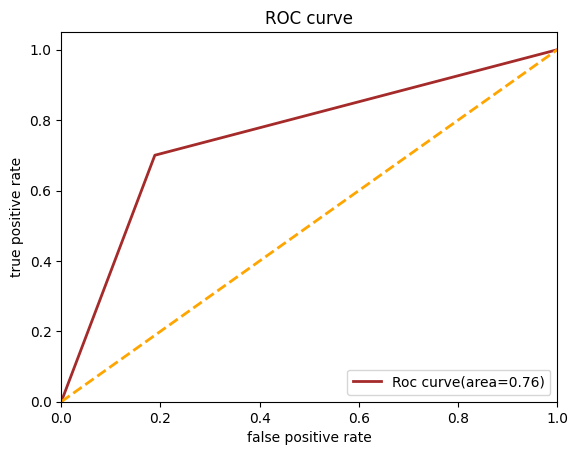

In [ ]:
fpr_sv_us,tpr_sv_us,treshold=roc_curve(Y_test_us,Y_pred_sv_us)
auc_sv_us=auc(fpr_sv_us,tpr_sv_us)
plt.figure()
lw=2
plt.plot(fpr_sv_us,tpr_sv_us,color='brown',lw=lw,label='Roc curve(area=%0.2f)' %auc_sv_us)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 64.375
              precision    recall  f1-score   support

           0       0.64      0.69      0.67       493
           1       0.65      0.60      0.62       467

    accuracy                           0.64       960
   macro avg       0.64      0.64      0.64       960
weighted avg       0.64      0.64      0.64       960

ROC-AUC Score 64.24721258214576


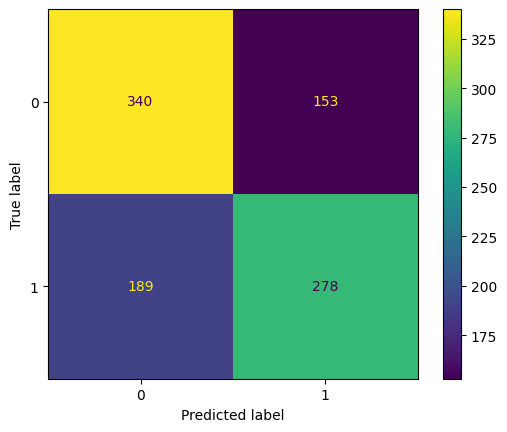

In [ ]:
gnb_us=GaussianNB()
gnb_us.fit(X_train_us,Y_train_us)
Y_pred_gnb_us=gnb_us.predict(X_test_us)
print("Accuracy=", accuracy_score(Y_test_us,Y_pred_gnb_us)*100)
print(classification_report(Y_test_us,Y_pred_gnb_us))
print(ConfusionMatrixDisplay.from_predictions(Y_test_us,Y_pred_gnb_us))
print("ROC-AUC Score", roc_auc_score(Y_test_us,Y_pred_gnb_us)*100)

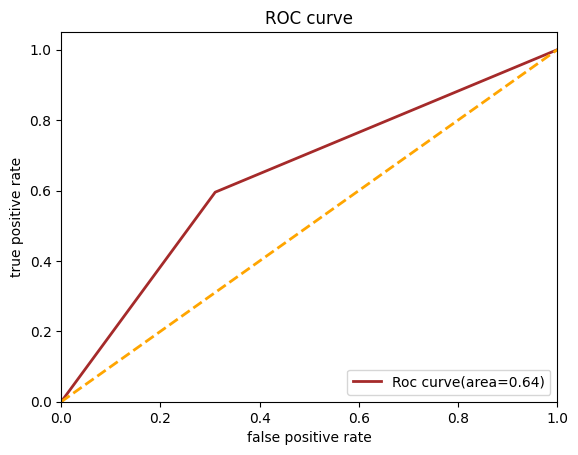

In [ ]:
fpr_gnb_us,tpr_gnb_us,treshold=roc_curve(Y_test_us,Y_pred_gnb_us)
auc_gnb_us=auc(fpr_gnb_us,tpr_gnb_us)
plt.figure()
lw=2
plt.plot(fpr_gnb_us,tpr_gnb_us,color='brown',lw=lw,label='Roc curve(area=%0.2f)' %auc_gnb_us)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 76.04166666666666
              precision    recall  f1-score   support

           0       0.73      0.84      0.78       493
           1       0.80      0.68      0.73       467

    accuracy                           0.76       960
   macro avg       0.77      0.76      0.76       960
weighted avg       0.76      0.76      0.76       960

ROC-AUC Score 75.83209906572095


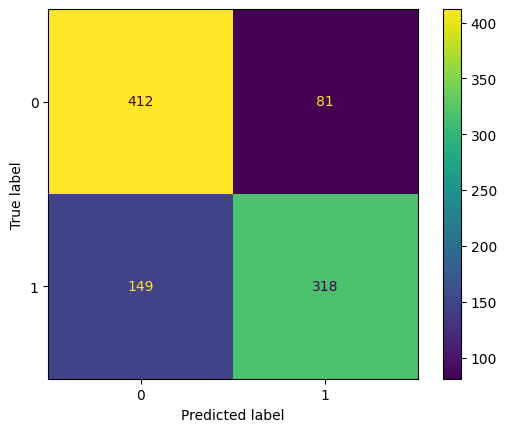

In [ ]:
dtc_us=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=4)
dtc_us.fit(X_train_us,Y_train_us)
Y_pred_dtc_us=dtc_us.predict(X_test_us)
print("Accuracy=", accuracy_score(Y_test_us,Y_pred_dtc_us)*100)
print(classification_report(Y_test_us,Y_pred_dtc_us))
print(ConfusionMatrixDisplay.from_predictions(Y_test_us,Y_pred_dtc_us))
print("ROC-AUC Score", roc_auc_score(Y_test_us,Y_pred_dtc_us)*100)

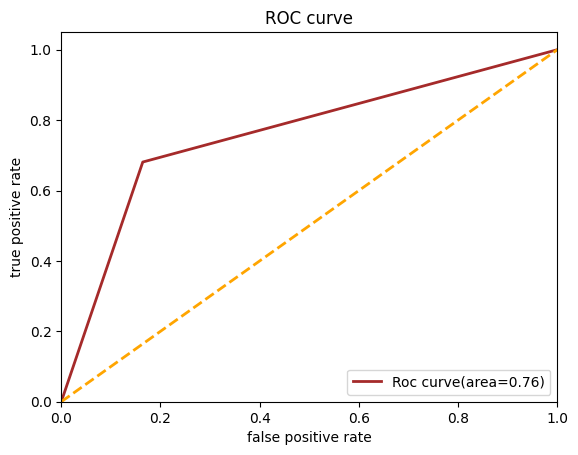

In [ ]:
fpr_dtc_us,tpr_dtc_us,treshold=roc_curve(Y_test_us,Y_pred_dtc_us)
auc_dtc_us=auc(fpr_dtc_us,tpr_dtc_us)
plt.figure()
lw=2
plt.plot(fpr_dtc_us,tpr_dtc_us,color='brown',lw=lw,label='Roc curve(area=%0.2f)' %auc_dtc_us)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 76.04166666666666
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       493
           1       0.81      0.66      0.73       467

    accuracy                           0.76       960
   macro avg       0.77      0.76      0.76       960
weighted avg       0.77      0.76      0.76       960

ROC-AUC Score 75.77563403711925


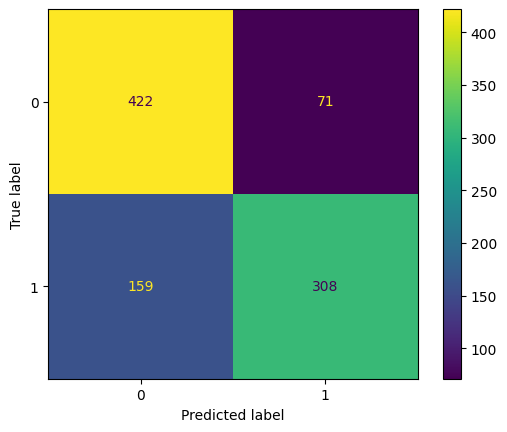

In [ ]:
rfc_us=RandomForestClassifier(n_estimators=200,random_state=1,criterion='entropy',max_depth=4)
rfc_us.fit(X_train_us,Y_train_us)
Y_pred_rfc_us=rfc_us.predict(X_test_us)
print("Accuracy=", accuracy_score(Y_test_us,Y_pred_rfc_us)*100)
print(classification_report(Y_test_us,Y_pred_rfc_us))
print(ConfusionMatrixDisplay.from_predictions(Y_test_us,Y_pred_rfc_us))
print("ROC-AUC Score", roc_auc_score(Y_test_us,Y_pred_rfc_us)*100)

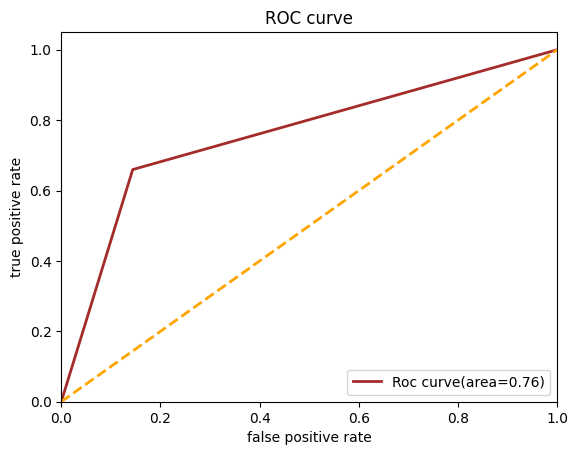

In [ ]:
fpr_rfc_us,tpr_rfc_us,treshold=roc_curve(Y_test_us,Y_pred_rfc_us)
auc_rfc_us=auc(fpr_rfc_us,tpr_rfc_us)
plt.figure()
lw=2
plt.plot(fpr_rfc_us,tpr_rfc_us,color='brown',lw=lw,label='Roc curve(area=%0.2f)' %auc_rfc_us)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 74.27083333333333
              precision    recall  f1-score   support

           0       0.72      0.83      0.77       493
           1       0.78      0.66      0.71       467

    accuracy                           0.74       960
   macro avg       0.75      0.74      0.74       960
weighted avg       0.75      0.74      0.74       960

ROC-AUC Score 74.04020310036442


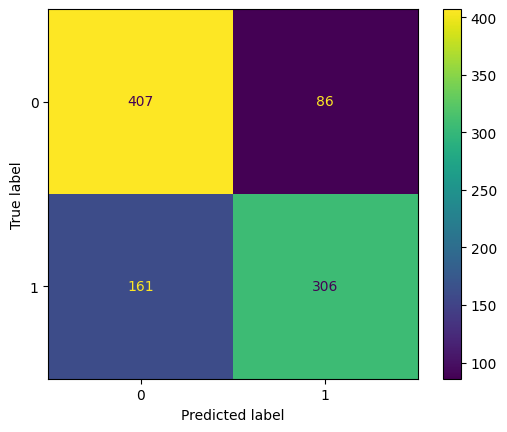

In [ ]:
ad_us=AdaBoostClassifier(n_estimators=50,random_state=1)
ad_us.fit(X_train_us,Y_train_us)
Y_pred_ad_us=ad_us.predict(X_test_us)
print("Accuracy=", accuracy_score(Y_test_us,Y_pred_ad_us)*100)
print(classification_report(Y_test_us,Y_pred_ad_us))
print(ConfusionMatrixDisplay.from_predictions(Y_test_us,Y_pred_ad_us))
print("ROC-AUC Score", roc_auc_score(Y_test_us,Y_pred_ad_us)*100)

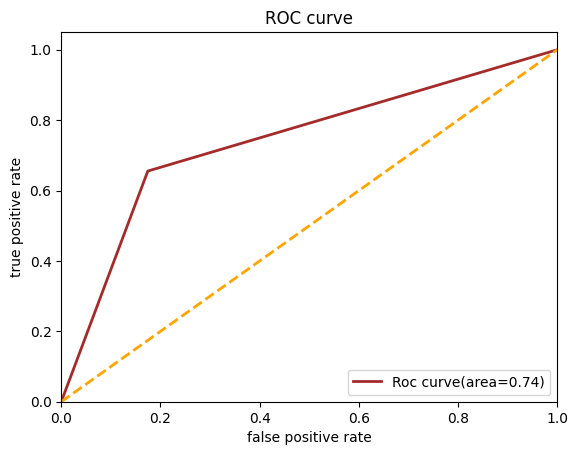

In [ ]:
fpr_ad_us,tpr_ad_us,treshold=roc_curve(Y_test_us,Y_pred_ad_us)
auc_ad_us=auc(fpr_ad_us,tpr_ad_us)
plt.figure()
lw=2
plt.plot(fpr_ad_us,tpr_ad_us,color='brown',lw=lw,label='Roc curve(area=%0.2f)' %auc_ad_us)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 79.375
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       493
           1       0.83      0.73      0.77       467

    accuracy                           0.79       960
   macro avg       0.80      0.79      0.79       960
weighted avg       0.80      0.79      0.79       960

ROC-AUC Score 79.20175823412137


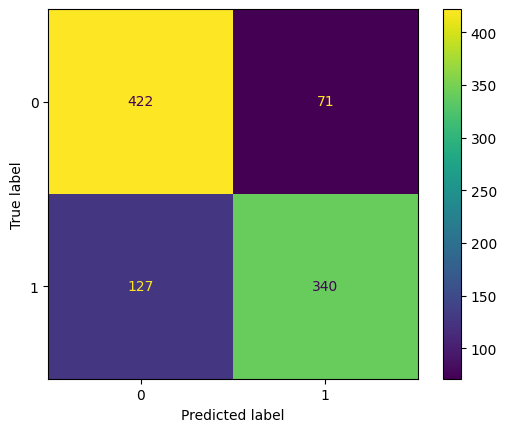

In [ ]:
xgb_us=XGBClassifier(n_estimators=50,random_state=1)
xgb_us.fit(X_train_us,Y_train_us)
Y_pred_xgb_us=xgb_us.predict(X_test_us)
print("Accuracy=", accuracy_score(Y_test_us,Y_pred_xgb_us)*100)
print(classification_report(Y_test_us,Y_pred_xgb_us))
print(ConfusionMatrixDisplay.from_predictions(Y_test_us,Y_pred_xgb_us))
print("ROC-AUC Score", roc_auc_score(Y_test_us,Y_pred_xgb_us)*100)

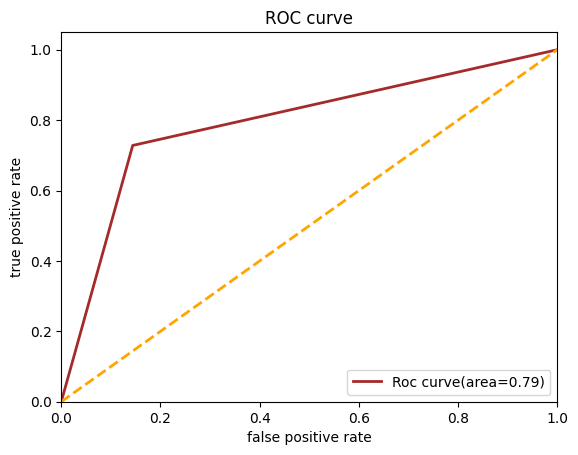

In [ ]:
fpr_xgb_us,tpr_xgb_us,treshold=roc_curve(Y_test_us,Y_pred_xgb_us)
auc_xgb_us=auc(fpr_xgb_us,tpr_xgb_us)
plt.figure()
lw=2
plt.plot(fpr_xgb_us,tpr_xgb_us,color='brown',lw=lw,label='Roc curve(area=%0.2f)' %auc_xgb_us)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Hyperparameter Tuning

In [ ]:
params_knn_us={'n_neighbors':[3,5,7,9],
            'weights':['uniform','distance'],
            'algorithm':['auto','ball_tree','kd_tree','brute']}
clf_knn_us=GridSearchCV(knn_us,params_knn_us,cv=5,scoring='accuracy')
clf_knn_us.fit(X_train_us,Y_train_us)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
params_sv_us={'kernel':['poly','linear','rbf'],
           'gamma':['scale','auto'],
           'decision_function_shape':['ovo','ovr']}
clf_sv_us=GridSearchCV(sv_us,params_sv_us,cv=5,scoring='accuracy')
clf_sv_us.fit(X_train_us,Y_train_us)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'linear', 'rbf']},
             scoring='accuracy')

In [ ]:
params_dtc_us={'criterion':['gini','entropy','log_loss'],
            'splitter':['best','random'],
            'max_depth':[4,5,6,7,8,9,10]}
clf_dtc_us=GridSearchCV(dtc_us,params_dtc_us,cv=5,scoring='accuracy')
clf_dtc_us.fit(X_train_us,Y_train_us)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=4,
                                              random_state=1),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
params_rfc_us={'n_estimators':[50,100,150,200],
            'max_features':['sqrt','log2'],
            'class_weight':['balanced','balanced_subsample']}
clf_rfc_us = GridSearchCV(rfc_us, params_rfc_us, cv=5, scoring='accuracy')
clf_rfc_us.fit(X_train_us, Y_train_us)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=4,
                                              n_estimators=200,
                                              random_state=1),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [ ]:
params_ad_us={'n_estimators': [50, 100, 200],
           'random_state':[1,2,3,4,5,6,7,8,9,10]}
clf_ad_us=GridSearchCV(ad_us,params_ad_us,cv=5,scoring='accuracy')
clf_ad_us.fit(X_train_us,Y_train_us)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1),
             param_grid={'n_estimators': [50, 100, 200],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [ ]:
params_xgb_us={'n_estimators':[50,100,200],
            'random_state':[1,2,3,4,5,6,7,8,9,10]}
clf_xgb_us=GridSearchCV(xgb_us,params_xgb_us,cv=5,scoring='accuracy')
clf_xgb_us.fit(X_train_us,Y_train_us)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...one,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=50,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=1, ...),
             param_grid={'n_estimators': [50, 100, 200],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

**Displaying best parameters**

In [ ]:
print("Best Parameters:")
print("KNeighbours Classifier:",clf_knn_us.best_params_)
print("SVC:",clf_sv_us.best_params_)
print("DecisionTree Classifier:",clf_dtc_us.best_params_)
print("Random Forest Classifier:",clf_rfc_us.best_params_)
print("AdaBoost Classifier:",clf_ad_us.best_params_)
print("XGB Classifier:",clf_xgb_us.best_params_)

Best Parameters:
KNeighbours Classifier: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'uniform'}
SVC: {'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'poly'}
DecisionTree Classifier: {'criterion': 'gini', 'max_depth': 7, 'splitter': 'best'}
Random Forest Classifier: {'class_weight': 'balanced_subsample', 'max_features': 'sqrt', 'n_estimators': 150}
AdaBoost Classifier: {'n_estimators': 50, 'random_state': 1}
XGB Classifier: {'n_estimators': 50, 'random_state': 1}


Performing classification algorithms after hyperparameter tuning

Accuracy= 76.14583333333333
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       493
           1       0.80      0.69      0.74       467

    accuracy                           0.76       960
   macro avg       0.77      0.76      0.76       960
weighted avg       0.77      0.76      0.76       960

ROC-AUC Score 75.94481194973743


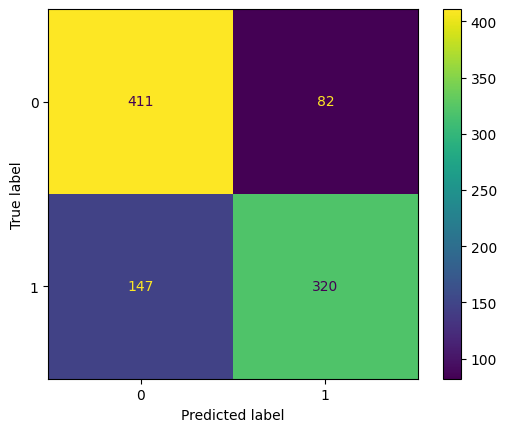

In [ ]:
knn1_us=KNeighborsClassifier(algorithm='auto',n_neighbors=9,weights='uniform')
knn1_us.fit(X_train_us,Y_train_us)
Y_pred_knn1_us=knn1_us.predict(X_test_us)
print("Accuracy=", accuracy_score(Y_test_us,Y_pred_knn1_us)*100)
print(classification_report(Y_test_us,Y_pred_knn1_us))
print(ConfusionMatrixDisplay.from_predictions(Y_test_us,Y_pred_knn1_us))
print("ROC-AUC Score", roc_auc_score(Y_test_us,Y_pred_knn1_us)*100)

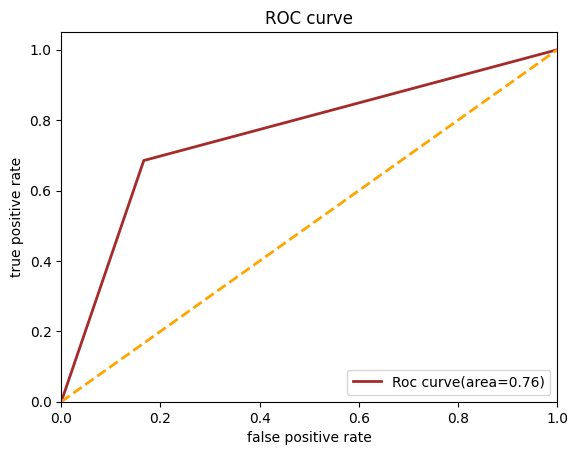

In [ ]:
fpr_knn1_us,tpr_knn1_us,treshold=roc_curve(Y_test_us,Y_pred_knn1_us)
auc_knn1_us=auc(fpr_knn1_us,tpr_knn1_us)
plt.figure()
lw=2
plt.plot(fpr_knn1_us,tpr_knn1_us,color='brown',lw=lw,label='Roc curve(area=%0.2f)' %auc_knn1_us)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 76.66666666666667
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       493
           1       0.80      0.69      0.74       467

    accuracy                           0.77       960
   macro avg       0.77      0.76      0.76       960
weighted avg       0.77      0.77      0.77       960

ROC-AUC Score 76.45755784407834


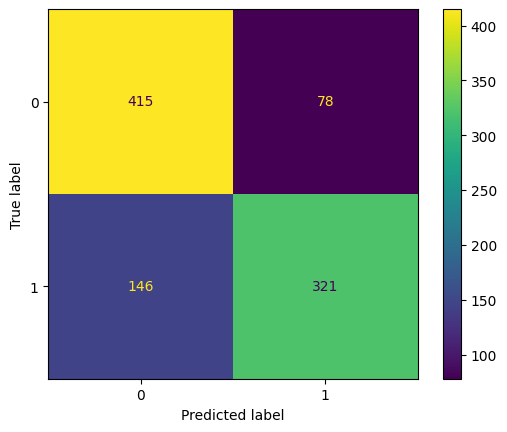

In [ ]:
sv1_us=SVC(decision_function_shape='ovo',gamma='scale',kernel='poly')
sv1_us.fit(X_train_us,Y_train_us)
Y_pred_sv1_us=sv1_us.predict(X_test_us)
print("Accuracy=", accuracy_score(Y_test_us,Y_pred_sv1_us)*100)
print(classification_report(Y_test_us,Y_pred_sv1_us))
print(ConfusionMatrixDisplay.from_predictions(Y_test_us,Y_pred_sv1_us))
print("ROC-AUC Score", roc_auc_score(Y_test_us,Y_pred_sv1_us)*100)

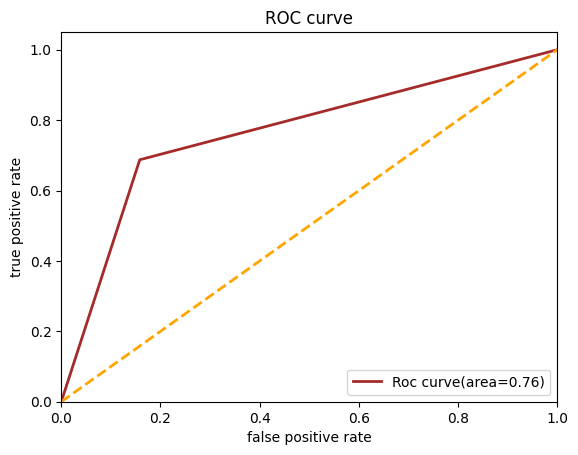

In [ ]:
fpr_sv1_us,tpr_sv1_us,treshold=roc_curve(Y_test_us,Y_pred_sv1_us)
auc_sv1_us=auc(fpr_sv1_us,tpr_sv1_us)
plt.figure()
lw=2
plt.plot(fpr_sv1_us,tpr_sv1_us,color='brown',lw=lw,label='Roc curve(area=%0.2f)' %auc_sv1_us)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 81.25
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       493
           1       0.88      0.71      0.79       467

    accuracy                           0.81       960
   macro avg       0.83      0.81      0.81       960
weighted avg       0.82      0.81      0.81       960

ROC-AUC Score 80.97649751771048


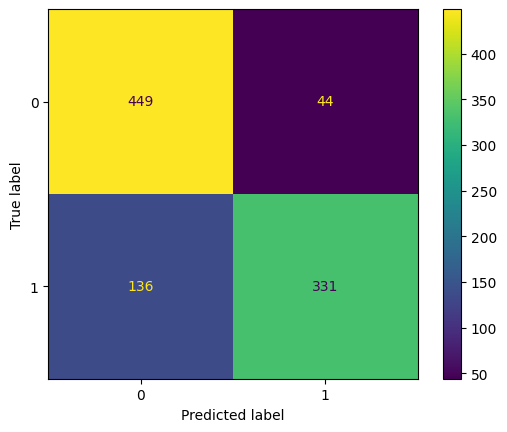

In [ ]:
dtc1_us=DecisionTreeClassifier(criterion='entropy',max_depth=7,splitter='best')
dtc1_us.fit(X_train_us,Y_train_us)
Y_pred_dtc1_us=dtc1_us.predict(X_test_us)
print("Accuracy=", accuracy_score(Y_test_us,Y_pred_dtc1_us)*100)
print(classification_report(Y_test_us,Y_pred_dtc1_us))
print(ConfusionMatrixDisplay.from_predictions(Y_test_us,Y_pred_dtc1_us))
print("ROC-AUC Score", roc_auc_score(Y_test_us,Y_pred_dtc1_us)*100)

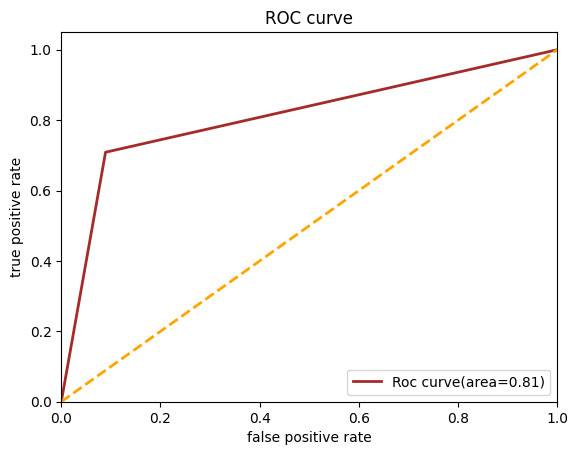

In [ ]:
fpr_dtc1_us,tpr_dtc1_us,treshold=roc_curve(Y_test_us,Y_pred_dtc1_us)
auc_dtc1_us=auc(fpr_dtc1_us,tpr_dtc1_us)
plt.figure()
lw=2
plt.plot(fpr_dtc1_us,tpr_dtc1_us,color='brown',lw=lw,label='Roc curve(area=%0.2f)' %auc_dtc1_us)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

Accuracy= 79.58333333333333
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       493
           1       0.82      0.74      0.78       467

    accuracy                           0.80       960
   macro avg       0.80      0.79      0.79       960
weighted avg       0.80      0.80      0.80       960

ROC-AUC Score 79.44412351073487


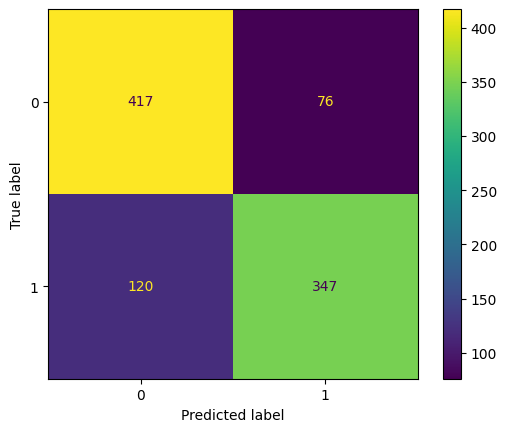

In [ ]:
rfc1_us=RandomForestClassifier(class_weight='balanced',max_features='log2',n_estimators=200,random_state=1)
rfc1_us.fit(X_train_us,Y_train_us)
Y_pred_rfc1_us=rfc1_us.predict(X_test_us)
print("Accuracy=", accuracy_score(Y_test_us,Y_pred_rfc1_us)*100)
print(classification_report(Y_test_us,Y_pred_rfc1_us))
print(ConfusionMatrixDisplay.from_predictions(Y_test_us,Y_pred_rfc1_us))
print("ROC-AUC Score", roc_auc_score(Y_test_us,Y_pred_rfc1_us)*100)

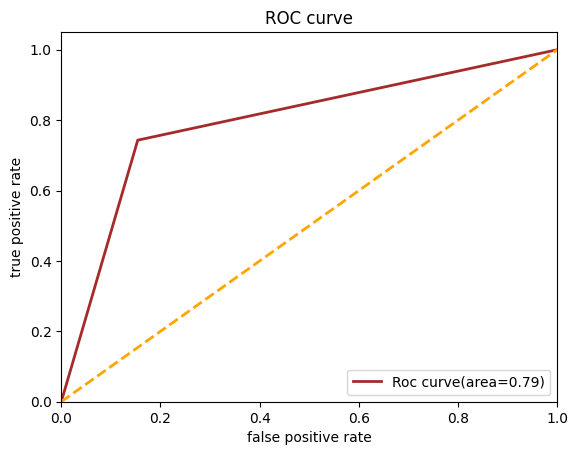

In [ ]:
fpr_rfc1_us,tpr_rfc1_us,treshold=roc_curve(Y_test_us,Y_pred_rfc1_us)
auc_rfc1_us=auc(fpr_rfc1_us,tpr_rfc1_us)
plt.figure()
lw=2
plt.plot(fpr_rfc1_us,tpr_rfc1_us,color='brown',lw=lw,label='Roc curve(area=%0.2f)' %auc_rfc1_us)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# The best model is XGBClassifier with hyperparameter tuning with 85% accuracy

In [ ]:
pickle.dump(xgb1_os,open('model_bank.sav','wb'))
pickle.dump(mms_os,open('scaler_bank.sav','wb'))